In [1]:
import pandas as pd

## I. Custom Functions
* add docstrings / make pretty for all finalized functions that are used

In [25]:
def clean_up(sparql_df):
    
    new_director_values = [1 if val == True else 0 for val in sparql_df.directorGender.str.contains('female|non-binary|transgender')]
    new_writer_values = [1 if val == True else 0 for val in sparql_df.screenwriterGender.str.contains('female|non-binary|transgender')]
    new_exec_values = [1 if val == True else 0 for val in sparql_df.executiveproducerGender.str.contains('female|non-binary|transgender')]
    new_producer_values = [1 if val == True else 0 for val in sparql_df.producerGender.str.contains('female|non-binary|transgender')]
    
    sparql_df['director_fnbt'] = new_director_values
    sparql_df['writer_fnbt'] = new_writer_values
    sparql_df['exec_fnbt'] = new_exec_values
    sparql_df['producer_fnbt'] = new_producer_values
    
    sparql_df['overall_fnbt'] = sparql_df['director_fnbt'] + sparql_df['writer_fnbt'] + sparql_df['exec_fnbt'] + sparql_df['producer_fnbt']
    
    cols_to_drop = ['directorName', 'directorGender', 'screenwriterName', 'screenwriterGender', 'executiveproducerName',\
               'executiveproducerGender', 'producerName', 'producerGender']
    sparql_df.drop(columns=cols_to_drop, axis=1, inplace=True)
    sparql_df.sort_values('overall_fnbt', ascending=False, inplace=True)
    sparql_df.drop_duplicates('movieTitle', inplace=True)
    sparql_df.sort_index(inplace=True)
    return sparql_df

#### Probably do not need these functions because `writer` will be dropped from future queries - only need `screenwriter`

In [3]:
# check for all unique values in gender columns, will use my column names within function since they're all the same

def check_unique_gender_values(df):
    gender_columns = ['directorGender', 'writerGender', 'screenwriterGender', 'executiveproducerGender', 'producerGender']
    for col in gender_columns:
        print(col)
        print(df[col].unique())

In [30]:
def locate_rows_in_df_by_values(df, column_to_search, value_list_to_search):
    for val in value_list_to_search:
        print(df.loc[df[column_to_search] == val])

In [14]:
def locate_rows_by_imdb_ids(dataset, name_of_imdb_id_col, imdb_id_list):
    selected_rows = []
    for imdb_id in imdb_id_list:
        row = dataset.loc[dataset[name_of_imdb_id_col] == imdb_id]
        selected_rows.append(row)
    return selected_rows

In [4]:
check_unique_gender_values(movies_2011_and_beyond)

directorGender
['male' 'female' nan 'transgender female' 'non-binary' 'transgender male']
writerGender
[nan 'male']
screenwriterGender
['male' 'female' nan 'transgender female' 'non-binary']
executiveproducerGender
['male' nan 'female']
producerGender
['male' 'female' 'transgender female' nan]


In [6]:
# investigate writerGender because this should probably be dropped and changed to screenwriter
movies_2011_and_beyond.writerName.unique()

array([nan, 'Slavoj Žižek', 'Rana Abrar'], dtype=object)

In [7]:
movies_2011_and_beyond.loc[movies_2011_and_beyond.writerName == 'Rana Abrar']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
15766,Black Briefcase: The Nuclear Trigger,Rana Abrar,male,Rana Abrar,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt7903992
16053,Son Of Kashmir Burhan,Rana Abrar,male,Rana Abrar,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt7675680
16390,The Evil Marriage,Rana Abrar,male,Rana Abrar,male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt8614336


In [ ]:
# check to see if these movies are in Bechdel dataset - if not, all 3 will be dropped because there is not much useful
# information for these movies

In [8]:
bechdel_df = pd.read_csv('my_data/bechdel_test_movies.csv')
bechdel_df.head()

,year,title,score,passing,imdb_id,imdb_link
0,2019,Alita: Battle Angel,3,1,tt0437086,http://us.imdb.com/title/tt0437086/
1,2019,American Woman,3,1,tt9109492,http://us.imdb.com/title/tt9109492/
2,2019,Close,3,1,tt5316540,http://us.imdb.com/title/tt5316540/
3,2019,Cold Pursuit,1,0,tt5719748,http://us.imdb.com/title/tt5719748/
4,2019,How to Train Your Dragon: The Hidden World,2,0,tt2386490,http://us.imdb.com/title/tt2386490/


In [16]:
# could turn this imdb_id finder into a function
rana_abrar_imdb_ids = []
for movie in movies_2011_and_beyond.loc[movies_2011_and_beyond.writerName == 'Rana Abrar'].values:
    rana_abrar_imdb_ids.append(movie[-1])
rana_abrar_imdb_ids

['tt7903992', 'tt7675680', 'tt8614336']

In [19]:
locate_rows_by_imdb_ids(bechdel_df, name_of_imdb_id_col='imdb_id', imdb_id_list=rana_abrar_imdb_ids)

[Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: []]

In [21]:
# confirm this function is actually saying there are no matching movies in Bechdel df rather than just being a 
# broken function

bechdel_df.loc[bechdel_df.imdb_id == 'tt7903992']

,year,title,score,passing,imdb_id,imdb_link


In [22]:
bechdel_df.loc[bechdel_df.title == 'The Evil Marriage']

,year,title,score,passing,imdb_id,imdb_link


In [23]:
# check to see if function works on movies that are definitely in both lists

movies_2011_and_beyond.loc[movies_2011_and_beyond.movieTitle == 'Alita: Battle Angel']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
8292,Alita: Battle Angel,Robert Rodriguez,male,NaN,NaN,James Cameron,male,NaN,NaN,James Cameron,male,170000000.0,359700000.0,tt0437086
8299,Alita: Battle Angel,Robert Rodriguez,male,NaN,NaN,Laeta Kalogridis,female,NaN,NaN,James Cameron,male,170000000.0,359700000.0,tt0437086
8307,Alita: Battle Angel,Robert Rodriguez,male,NaN,NaN,James Cameron,male,NaN,NaN,Robert Rodriguez,male,170000000.0,359700000.0,tt0437086
8314,Alita: Battle Angel,Robert Rodriguez,male,NaN,NaN,Laeta Kalogridis,female,NaN,NaN,Robert Rodriguez,male,170000000.0,359700000.0,tt0437086
8331,Alita: Battle Angel,Robert Rodriguez,male,NaN,NaN,James Cameron,male,NaN,NaN,Jon Landau,male,170000000.0,359700000.0,tt0437086
8333,Alita: Battle Angel,Robert Rodriguez,male,NaN,NaN,Laeta Kalogridis,female,NaN,NaN,Jon Landau,male,170000000.0,359700000.0,tt0437086


In [24]:
movies_2011_and_beyond.loc[movies_2011_and_beyond.movieTitle == 'Close']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
15209,Close,Vicky Jewson,female,NaN,NaN,Vicky Jewson,female,NaN,NaN,NaN,NaN,NaN,NaN,tt5316540


In [32]:
movies_to_search = ['Close', 'Alita: Battle Angel', 'American Woman']
locate_rows_in_df_by_values(movies_2011_and_beyond, 'movieTitle', movies_to_search)

      movieTitle  directorName directorGender writerName writerGender  \
15209      Close  Vicky Jewson         female        NaN          NaN   

      screenwriterName screenwriterGender executiveproducerName  \
15209     Vicky Jewson             female                   NaN   

      executiveproducerGender producerName producerGender  budgetAmount  \
15209                     NaN          NaN            NaN           NaN   

       boxofficeAmount     imdbId  
15209              NaN  tt5316540  
               movieTitle      directorName directorGender writerName  \
8292  Alita: Battle Angel  Robert Rodriguez           male        NaN   
8299  Alita: Battle Angel  Robert Rodriguez           male        NaN   
8307  Alita: Battle Angel  Robert Rodriguez           male        NaN   
8314  Alita: Battle Angel  Robert Rodriguez           male        NaN   
8331  Alita: Battle Angel  Robert Rodriguez           male        NaN   
8333  Alita: Battle Angel  Robert Rodriguez           mal

In [34]:
test_imdb_ids = ['tt0437086', 'tt5316540']
locate_rows_by_imdb_ids(movies_2011_and_beyond, 'imdbId', test_imdb_ids)

[               movieTitle      directorName directorGender writerName  \
 8292  Alita: Battle Angel  Robert Rodriguez           male        NaN   
 8299  Alita: Battle Angel  Robert Rodriguez           male        NaN   
 8307  Alita: Battle Angel  Robert Rodriguez           male        NaN   
 8314  Alita: Battle Angel  Robert Rodriguez           male        NaN   
 8331  Alita: Battle Angel  Robert Rodriguez           male        NaN   
 8333  Alita: Battle Angel  Robert Rodriguez           male        NaN   
 
      writerGender  screenwriterName screenwriterGender executiveproducerName  \
 8292          NaN     James Cameron               male                   NaN   
 8299          NaN  Laeta Kalogridis             female                   NaN   
 8307          NaN     James Cameron               male                   NaN   
 8314          NaN  Laeta Kalogridis             female                   NaN   
 8331          NaN     James Cameron               male                   N

In [35]:
locate_rows_by_imdb_ids(bechdel_df, 'imdb_id', test_imdb_ids)

[   year                title  score  passing    imdb_id  \
 0  2019  Alita: Battle Angel      3        1  tt0437086   
 
                              imdb_link  
 0  http://us.imdb.com/title/tt0437086/  ,
    year  title  score  passing    imdb_id                            imdb_link
 2  2019  Close      3        1  tt5316540  http://us.imdb.com/title/tt5316540/]

In [33]:
movies_2011_and_beyond.loc[movies_2011_and_beyond.movieTitle == 'American Woman']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId


In [36]:
# well the outputs don't look pretty, but at least they work!

In [37]:
# the whole point of all that was just to see if I could drop the writerName and writerGender columns

In [38]:
movies_2011_and_beyond.loc[movies_2011_and_beyond.writerName == 'Slavoj Žižek']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
11007,The Pervert's Guide to Ideology,Sophie Fiennes,female,Slavoj Žižek,male,Slavoj Žižek,male,NaN,NaN,NaN,NaN,NaN,NaN,tt2152198


In [40]:
# check to see if this movie is in the bechdel dataset
locate_rows_by_imdb_ids(bechdel_df, 'imdb_id', 'tt2152198')

[Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: [], Empty DataFrame
 Columns: [year, title, score, passing, imdb_id, imdb_link]
 Index: []]

In [41]:
bechdel_df.loc[bechdel_df.title == 'The Pervert\'s Guide to Ideology']

,year,title,score,passing,imdb_id,imdb_link


In [42]:
# drop writerName and writerGender from movies_200 df
movies_2011_and_beyond.drop(columns=['writerName', 'writerGender'], axis=1, inplace=True)

In [43]:
movies_2011_and_beyond.head()

,movieTitle,directorName,directorGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,Fast Five,Neal H. Moritz,male,Chris Morgan,male,Justin Lin,male,Vin Diesel,male,NaN,626100000.0,tt1596343
1,Albert Nobbs,Rodrigo García,male,Glenn Close,female,NaN,NaN,Bonnie Curtis,female,NaN,NaN,tt1602098
2,Albert Nobbs,Rodrigo García,male,George Moore,male,NaN,NaN,Bonnie Curtis,female,NaN,NaN,tt1602098
3,300: Rise of an Empire,Noam Murro,male,Kurt Johnstad,male,NaN,NaN,Thomas Tull,male,110000000.0,337580051.0,tt1253863
4,Fast Five,Neal H. Moritz,male,Chris Morgan,male,Justin Lin,male,Neal H. Moritz,male,NaN,626100000.0,tt1596343


#### Convert gender columns to a boolean `FTNB` column to include cis and transgender females, transgender males, and non-binary people
* Need to be able to drop duplicate rows so that there is only one row for each movie
* Each movie row would indicate whether one of its directors, writers, or producers is of an underrepresented gender
* Would like an additional column for presence of underrepresented gender in ANY of those listed positions

In [117]:
# new boolean gender columns
# drop name and other gender columns
# add overall gender column
# sort by descending overall values
# drop duplicates, keeping first
# will have to check writer columns in one other dataset, then might drop that from the other queries to download

In [133]:
bechdel_df.loc[bechdel_df.title == 'Star Wars: The Last Jedi']

,year,title,score,passing,imdb_id,imdb_link
349,2017,Star Wars: The Last Jedi,3,1,tt2527336,http://us.imdb.com/title/tt2527336/


In [134]:
# The Last Jedi should be passing once all rows are considered

In [163]:
# please work please work please work
# clean_up(testing)

In [159]:
testing.loc[testing.movieTitle == 'Star Wars: The Last Jedi']

,movieTitle,writerName,writerGender,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
4585,Star Wars: The Last Jedi,NaN,NaN,200000000.0,42577974.0,tt2527336,0,0,0,1,1


In [ ]:
# yay!

## II. Create new movie dataset from all downloaded queries

### A. Movies released in 2011 - present

In [164]:
cleaned_2011_and_beyond = pd.read_csv('my_data/movies_2011_and_beyond.csv')
cleaned_2011_and_beyond.head()

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,Fast Five,Neal H. Moritz,male,NaN,NaN,Chris Morgan,male,Justin Lin,male,Vin Diesel,male,NaN,626100000.0,tt1596343
1,Albert Nobbs,Rodrigo García,male,NaN,NaN,Glenn Close,female,NaN,NaN,Bonnie Curtis,female,NaN,NaN,tt1602098
2,Albert Nobbs,Rodrigo García,male,NaN,NaN,George Moore,male,NaN,NaN,Bonnie Curtis,female,NaN,NaN,tt1602098
3,300: Rise of an Empire,Noam Murro,male,NaN,NaN,Kurt Johnstad,male,NaN,NaN,Thomas Tull,male,110000000.0,337580051.0,tt1253863
4,Fast Five,Neal H. Moritz,male,NaN,NaN,Chris Morgan,male,Justin Lin,male,Neal H. Moritz,male,NaN,626100000.0,tt1596343


In [166]:
cleaned_2011_and_beyond.drop(columns=['writerName', 'writerGender'], axis=1, inplace=True)

In [167]:
clean_up(cleaned_2011_and_beyond)

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,Fast Five,NaN,626100000.0,tt1596343,0,0,0,0,0
1,Albert Nobbs,NaN,NaN,tt1602098,0,1,0,1,2
8,Lore,NaN,NaN,tt1996310,1,1,0,1,3
11,Get the Gringo,NaN,NaN,tt1567609,0,0,0,0,0
40,Airborne,NaN,NaN,tt1827354,0,0,0,0,0
43,300: Rise of an Empire,110000000.0,337580051.0,tt1253863,0,0,0,1,1
53,Super 8,NaN,260100000.0,tt1650062,0,0,0,0,0
54,Puncture,NaN,NaN,tt1582248,0,0,0,0,0
55,Chinese Zodiac,NaN,NaN,tt1424310,0,0,0,0,0
58,The Double,NaN,NaN,tt1646980,0,0,0,0,0


### B. Movies from 2005 to 2010

In [168]:
cleaned_movies_2005_to_2010 = pd.read_csv('my_data/movies_2005_2010_inclusive.csv')
cleaned_movies_2005_to_2010.head()

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,The Reader,Stephen Daldry,male,NaN,NaN,Bernhard Schlink,male,Bob Weinstein,male,Anthony Minghella,male,NaN,NaN,tt0976051
1,King Kong,Peter Jackson,male,NaN,NaN,Peter Jackson,male,Robert Zemeckis,male,Peter Jackson,male,207000000.0,550517357.0,tt0360717
2,The Reader,Stephen Daldry,male,NaN,NaN,Bernhard Schlink,male,Harvey Weinstein,male,Donna Gigliotti,female,NaN,NaN,tt0976051
3,King Kong,Peter Jackson,male,NaN,NaN,Fran Walsh,female,Robert Zemeckis,male,Fran Walsh,female,207000000.0,550517357.0,tt0360717
4,King Kong,Peter Jackson,male,NaN,NaN,Edgar Wallace,male,Robert Zemeckis,male,Fran Walsh,female,207000000.0,550517357.0,tt0360717


#### Drop `writer` columns and `clean_up` df

In [171]:
cleaned_movies_2005_to_2010.drop(columns=['writerName', 'writerGender'], axis=1, inplace=True)

In [172]:
clean_up(cleaned_movies_2005_to_2010)

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
14,The King's Speech,NaN,414200000.0,tt1504320,0,0,0,0,0
22,King Kong,207000000.0,550517357.0,tt0360717,0,1,0,1,2
31,Twilight,NaN,393600000.0,tt1099212,1,1,0,0,2
33,The Reader,NaN,NaN,tt0976051,0,0,0,1,1
40,Valkyrie,80000000.0,200000000.0,tt0985699,0,0,0,0,0
42,Must Love Dogs,NaN,NaN,tt0417001,0,0,0,0,0
44,Crank,NaN,NaN,tt0479884,0,0,0,0,0
46,Feast of Love,NaN,NaN,tt0800027,0,0,0,0,0
47,300,65000000.0,456068181.0,tt0416449,0,0,0,0,0
49,Obsessed,NaN,NaN,tt1198138,0,0,0,0,0


### C. Merge first two datasets

In [173]:
movies_2005_and_beyond = pd.concat([cleaned_2011_and_beyond, cleaned_movies_2005_to_2010], ignore_index=True)

In [174]:
movies_2005_and_beyond.head()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,Fast Five,NaN,626100000.0,tt1596343,0,0,0,0,0
1,Albert Nobbs,NaN,NaN,tt1602098,0,1,0,1,2
2,Lore,NaN,NaN,tt1996310,1,1,0,1,3
3,Get the Gringo,NaN,NaN,tt1567609,0,0,0,0,0
4,Airborne,NaN,NaN,tt1827354,0,0,0,0,0


In [175]:
movies_2005_and_beyond.tail()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
16785,Must Read After My Death,NaN,NaN,tt1249414,0,0,0,0,0
16786,The Upside of Anger,NaN,NaN,tt0365885,0,0,0,0,0
16787,10th & Wolf,NaN,NaN,tt0360323,0,0,0,1,1
16788,A Simple Noodle Story,NaN,NaN,tt1428556,0,0,0,0,0
16789,My Apocalypse,NaN,NaN,tt0119970,0,0,0,0,0


In [176]:
movies_2005_and_beyond.shape

(16790, 9)

### D. Clean and append movies from 1999 to 2004

In [177]:
cleaned_movies_1999_to_2004 = pd.read_csv('my_data/movies_1999_2004_inclusive.csv')
cleaned_movies_1999_to_2004.head()

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,The Hunted,William Friedkin,male,NaN,NaN,Art Monterastelli,male,NaN,NaN,James Jacks,male,NaN,NaN,tt0269347
1,Gangs of New York,Martin Scorsese,male,NaN,NaN,Jay Cocks,male,NaN,NaN,Harvey Weinstein,male,97000000.0,193772504.0,tt0217505
2,Resident Evil,Paul W. S. Anderson,male,NaN,NaN,Paul W. S. Anderson,male,NaN,NaN,Samuel Hadida,male,33000000.0,102441078.0,tt0120804
3,My Date with Drew,Brian Herzlinger,male,NaN,NaN,NaN,NaN,NaN,NaN,Brian Herzlinger,male,NaN,NaN,tt0378407
4,Runaway Jury,Gary Fleder,male,NaN,NaN,Brian Koppelman,male,NaN,NaN,Arnon Milchan,male,NaN,NaN,tt0313542


In [178]:
cleaned_movies_1999_to_2004.drop(columns=['writerName', 'writerGender'], axis=1, inplace=True)

In [179]:
clean_up(cleaned_movies_1999_to_2004)
cleaned_movies_1999_to_2004.tail()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
8029,Venus and Mars,NaN,NaN,tt0205498,0,0,0,0,0
8031,101 Reykjavík,NaN,1.264040e+02,tt0237993,0,0,0,0,0
8035,Gosford Park,19800000.0,8.770000e+07,tt0280707,0,0,0,0,0
8036,Bowling for Columbine,NaN,NaN,tt0310793,0,0,0,0,0
8040,Joy Ride,NaN,NaN,tt0206314,0,0,0,0,0


In [180]:
cleaned_movies_1999_to_2004[500:550]

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
1902,Undisputed,NaN,NaN,tt0281322,0,0,0,0,0
1903,The In-Laws,NaN,NaN,tt0314786,0,0,0,0,0
1904,True Crime,NaN,NaN,tt0139668,0,0,0,0,0
1905,Edges of the Lord,NaN,NaN,tt0245090,0,0,0,0,0
1907,The Statement,NaN,NaN,tt0340376,0,0,0,0,0
1910,Jack Frost,NaN,NaN,tt0141109,0,0,0,0,0
1911,A Midsummer Night's Dream,NaN,NaN,tt0140379,0,1,0,0,1
1918,Iris,NaN,NaN,tt0280778,0,0,0,0,0
1920,Ghost Ship,NaN,NaN,tt0288477,0,0,0,0,0
1922,Ararat,NaN,NaN,tt0273435,0,0,0,0,0


In [181]:
movies_1999_and_beyond = pd.concat([movies_2005_and_beyond, cleaned_movies_1999_to_2004], ignore_index=True)

In [182]:
movies_1999_and_beyond.shape

(21499, 9)

### E. Clean and append movies from 1980 to 1998

In [183]:
movies_1980_to_1998 = pd.read_csv('my_data/movies_1980_to_1998_inclusive.csv')
movies_1980_to_1998.head()

,movieTitle,directorName,directorGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,Beloved,Jonathan Demme,male,Richard LaGravenese,male,Ron Bozman,male,Edward Saxon,male,NaN,NaN,tt0120603
1,First Blood,Ted Kotcheff,male,William Sackheim,male,NaN,NaN,Mario Kassar,male,15000000.0,125212904.0,tt0083944
2,Beloved,Jonathan Demme,male,Toni Morrison,female,Ron Bozman,male,Edward Saxon,male,NaN,NaN,tt0120603
3,Evita,Alan Parker,male,Oliver Stone,male,NaN,NaN,Alan Parker,male,NaN,NaN,tt0116250
4,Beloved,Jonathan Demme,male,Adam Brooks,male,Ron Bozman,male,Jonathan Demme,male,NaN,NaN,tt0120603


In [184]:
clean_up(movies_1980_to_1998)
movies_1980_to_1998.tail()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
14397,Top Secret!,NaN,NaN,tt0088286,0,0,0,0,0
14398,Denise Calls Up,NaN,NaN,tt0112844,0,0,0,0,0
14399,Serial Mom,NaN,NaN,tt0111127,0,0,0,0,0
14400,Swoon,NaN,NaN,tt0105508,0,0,0,1,1
14401,Theodore Rex,NaN,NaN,tt0114658,0,0,0,0,0


In [185]:
movies_1980_and_beyond = pd.concat([movies_1999_and_beyond, movies_1980_to_1998], ignore_index=True)
movies_1980_and_beyond.shape

(30735, 9)

### E. Movies from 1950 to 1979

In [186]:
movies_1950_to_1979 = pd.read_csv('my_data/movies_1950_to_1979_inclusive.csv')
movies_1950_to_1979.head()

,movieTitle,directorName,directorGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,To Hell and Back,Henry Mancini,male,Audie Murphy,male,NaN,NaN,Aaron Rosenberg,male,NaN,NaN,tt0048729
1,To Hell and Back,Irving Gertz,male,Audie Murphy,male,NaN,NaN,Henry Mancini,male,NaN,NaN,tt0048729
2,Two English Girls,François Truffaut,male,François Truffaut,male,NaN,NaN,Marcel Berbert,male,NaN,NaN,tt0066989
3,To Hell and Back,Maury Gertsman,male,Audie Murphy,male,NaN,NaN,Irving Gertz,male,NaN,NaN,tt0048729
4,To Hell and Back,Walter Bedell Smith,male,Audie Murphy,male,NaN,NaN,Irving Gertz,male,NaN,NaN,tt0048729


In [187]:
clean_up(movies_1950_to_1979)
movies_1950_to_1979.tail()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
15162,"I, Maureen",NaN,NaN,tt0180751,1,0,0,0,1
15163,Oliver Twist,NaN,NaN,tt0272226,0,0,0,0,0
15164,Man on a Bus,NaN,NaN,tt0183487,0,0,0,0,0
15165,"A Man, a Woman, and a Killer",NaN,NaN,tt0073348,0,0,0,0,0
15166,None but the Brave,NaN,NaN,tt0053831,0,0,0,0,0


In [188]:
movies_1950_and_beyond = pd.concat([movies_1980_and_beyond, movies_1950_to_1979], ignore_index=True)
movies_1950_and_beyond.shape

(41493, 9)

### F. Movies 1949 and Earlier

In [189]:
movies_1949_and_earlier = pd.read_csv('my_data/movies_1949_and_earlier.csv')
movies_1949_and_earlier.head()

,movieTitle,directorName,directorGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,British Agent,Michael Curtiz,male,NaN,NaN,NaN,NaN,Michael Curtiz,male,NaN,NaN,tt0024915
1,The Third Man,Carol Reed,male,Alexander Korda,male,NaN,NaN,David O. Selznick,male,NaN,NaN,tt0041959
2,Dracula,Karl Freund,male,Garrett Fort,male,NaN,NaN,Tod Browning,male,NaN,NaN,tt0021814
3,All Quiet on the Western Front,Lewis Milestone,male,C. Gardner Sullivan,male,NaN,NaN,Carl Laemmle,male,1200000.0,NaN,tt0020629
4,Go Into Your Dance,Archie Mayo,male,Earl Baldwin,male,NaN,NaN,Jack Warner,male,NaN,NaN,tt0026418


In [190]:
clean_up(movies_1949_and_earlier)
movies_1949_and_earlier.tail()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
18753,Foolish Wives,NaN,NaN,tt0013140,0,0,0,0,0
18755,Cairo,NaN,NaN,tt0034565,0,0,0,0,0
18757,The Vanishing Legion,NaN,NaN,tt0022531,0,0,0,0,0
18758,The Citadel,NaN,NaN,tt0029995,0,1,0,0,1
18760,Things to Come,NaN,NaN,tt0028358,0,0,0,0,0


In [191]:
# just curious
movies_1949_and_earlier.overall_fnbt.unique()

array([0, 1, 2, 3])

In [193]:
movies_1949_and_earlier.overall_fnbt.value_counts().nlargest(5)

0    11756
1     1243
2       57
3       15
Name: overall_fnbt, dtype: int64

In [194]:
all_the_movies = pd.concat([movies_1950_and_beyond, movies_1949_and_earlier], ignore_index=True)

In [195]:
all_the_movies.shape

(54564, 9)

In [196]:
all_the_movies.to_csv('my_data/movies_cleaned_with_new_columns.csv')

### G. New Query - all Movies on Wikidata with a Bechdel ID
Still having trouble finding a good percentage of the movies in the Bechdel dataset, so tried a new query

In [30]:
new_bechdel_query = pd.read_csv('my_data/bechdel_id_query.csv')
new_bechdel_query.head()

,title,directorName,directorGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Ute Emmerich,female,Roland Emmerich,male,NaN,817400891.0,tt0116629
1,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Ute Emmerich,female,Dean Devlin,male,NaN,817400891.0,tt0116629
2,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Roland Emmerich,male,Roland Emmerich,male,NaN,817400891.0,tt0116629
3,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Roland Emmerich,male,Dean Devlin,male,NaN,817400891.0,tt0116629
4,Independence Day,Roland Emmerich,male,Dean Devlin,male,Ute Emmerich,female,Roland Emmerich,male,NaN,817400891.0,tt0116629


In [31]:
new_bechdel_query.title.nunique()

7161

#### Apply cleaning methods used on previous datasets

In [32]:
# change title column to movieTitle so the function will work
new_bechdel_query.rename(index=str, columns={"title": "movieTitle"}, inplace=True)

In [33]:
new_bechdel_query.head()

,movieTitle,directorName,directorGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Ute Emmerich,female,Roland Emmerich,male,NaN,817400891.0,tt0116629
1,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Ute Emmerich,female,Dean Devlin,male,NaN,817400891.0,tt0116629
2,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Roland Emmerich,male,Roland Emmerich,male,NaN,817400891.0,tt0116629
3,Independence Day,Roland Emmerich,male,Roland Emmerich,male,Roland Emmerich,male,Dean Devlin,male,NaN,817400891.0,tt0116629
4,Independence Day,Roland Emmerich,male,Dean Devlin,male,Ute Emmerich,female,Roland Emmerich,male,NaN,817400891.0,tt0116629


In [34]:
clean_up(new_bechdel_query)

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
10004,The Dark Crystal,NaN,NaN,tt0083791,0,0,0,0,0
10005,The Thin Man Goes Home,NaN,NaN,tt0037365,0,0,0,0,0
10007,Picture Perfect,NaN,NaN,tt0119896,0,1,0,0,1
10009,The Cruel Sea,NaN,NaN,tt0045659,0,0,0,0,0
10010,Our Hospitality,NaN,NaN,tt0014341,0,0,0,0,0
10015,Little Caesar,NaN,NaN,tt0021079,0,0,0,0,0
10016,The Long Walk Home,NaN,NaN,tt0100046,0,0,0,0,0
10017,Cléo from 5 to 7,NaN,NaN,tt0055852,1,1,0,0,2
10018,The Spanish Gardener,NaN,NaN,tt0049787,0,0,0,0,0
10021,Antitrust,NaN,NaN,tt0218817,0,0,0,0,0


## III. Add to Bechdel Test dataset

In [2]:
bechdel_df = pd.read_csv('my_data/bechdel_test_movies.csv')
bechdel_df.head()

,year,title,score,passing,imdb_id,imdb_link
0,2019,Alita: Battle Angel,3,1,tt0437086,http://us.imdb.com/title/tt0437086/
1,2019,American Woman,3,1,tt9109492,http://us.imdb.com/title/tt9109492/
2,2019,Close,3,1,tt5316540,http://us.imdb.com/title/tt5316540/
3,2019,Cold Pursuit,1,0,tt5719748,http://us.imdb.com/title/tt5719748/
4,2019,How to Train Your Dragon: The Hidden World,2,0,tt2386490,http://us.imdb.com/title/tt2386490/


In [3]:
bechdel_df.drop('imdb_link', axis=1, inplace=True)

In [4]:
bechdel_df.tail()

,year,title,score,passing,imdb_id
8045,1896,Une nuit terrible,0,0,tt0000131
8046,1895,"The Execution of Mary, Queen of Scots",0,0,tt0132134
8047,1895,Tables Turned on the Gardener,0,0,tt0000014
8048,1892,Pauvre Pierrot,0,0,tt0000003
8049,1888,Roundhay Garden Scene,0,0,tt0392728


In [199]:
for imdb in bechdel_df.imdb_id.values:
    print(imdb)
    break

tt0437086


In [5]:
all_the_movies = pd.read_csv('my_data/movies_cleaned_with_new_columns.csv')
all_the_movies.head()

,Unnamed: 0,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,0,Fast Five,NaN,626100000.0,tt1596343,0,0,0,0,0
1,1,Albert Nobbs,NaN,NaN,tt1602098,0,1,0,1,2
2,2,Lore,NaN,NaN,tt1996310,1,1,0,1,3
3,3,Get the Gringo,NaN,NaN,tt1567609,0,0,0,0,0
4,4,Airborne,NaN,NaN,tt1827354,0,0,0,0,0


In [6]:
all_the_movies.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
all_the_movies.tail()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
54559,Foolish Wives,NaN,NaN,tt0013140,0,0,0,0,0
54560,Cairo,NaN,NaN,tt0034565,0,0,0,0,0
54561,The Vanishing Legion,NaN,NaN,tt0022531,0,0,0,0,0
54562,The Citadel,NaN,NaN,tt0029995,0,1,0,0,1
54563,Things to Come,NaN,NaN,tt0028358,0,0,0,0,0


In [8]:
bechdel_ids = bechdel_df.imdb_id.values
the_other_ids = all_the_movies.imdbId.values

In [9]:
shared_ids = set(bechdel_ids) & set(the_other_ids)
len(shared_ids)

5471

In [10]:
# check to see what might be missing 

In [11]:
type(shared_ids)

set

In [14]:
missing_movies = []
for bechdel_id in bechdel_ids:
    if bechdel_id not in list(shared_ids):
        missing_movies.append(bechdel_id)

In [15]:
len(missing_movies)

2577

In [16]:
2577 + 5471

8048

In [17]:
bechdel_df.shape

(8050, 5)

In [18]:
missing_movies[:10]

['tt9109492',
 'tt2386490',
 'tt3513498',
 'tt6078866',
 'tt7605074',
 'tt9358120',
 'tt6142496',
 'tt1620680',
 'tt4244998',
 'tt8020896']

In [21]:
for missing_id in missing_movies[:10]:
    print(bechdel_df.loc[bechdel_df.imdb_id == missing_id])

   year           title  score  passing    imdb_id
1  2019  American Woman      3        1  tt9109492
   year                                       title  score  passing    imdb_id
4  2019  How to Train Your Dragon: The Hidden World      2        0  tt2386490
   year                              title  score  passing    imdb_id
6  2019  The Lego Movie 2: The Second Part      3        1  tt3513498
   year title  score  passing    imdb_id
9  2019  Soni      3        1  tt6078866
    year                                  title  score  passing    imdb_id
10  2019  The Wandering Earth (Liu Lang Di Qiu)      3        1  tt7605074
    year                  title  score  passing    imdb_id
11  2019  We Are Little Zombies      2        0  tt9358120
    year       title  score  passing    imdb_id
12  2018  6 Balloons      3        1  tt6142496
    year              title  score  passing    imdb_id
17  2018  A Wrinkle in Time      3        1  tt1620680
    year  title  score  passing    imdb_id
1

In [35]:
new_query_ids = new_bechdel_query.imdbId.values

In [36]:
shared_ids = set(bechdel_ids) & set(new_query_ids)
len(shared_ids)

7147

In [ ]:
# not perfect - but so much better 

In [37]:
bechdel_appended = bechdel_df.merge(new_bechdel_query, left_on='imdb_id', right_on='imdbId', how='outer')

In [38]:
bechdel_appended.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
bechdel_appended.shape

(8064, 14)

In [40]:
bechdel_appended.isnull().sum()

year                 14
title                14
score                14
passing              14
imdb_id              14
movieTitle          900
budgetAmount       7157
boxofficeAmount    6892
imdbId              906
director_fnbt       900
writer_fnbt         900
exec_fnbt           900
producer_fnbt       900
overall_fnbt        900
dtype: int64

In [41]:
import numpy as np

In [42]:
indices_missing_ids = np.where(bechdel_appended['imdbId'].isna())

In [54]:
len(indices_missing_ids[0])

906

In [58]:
bechdel_appended.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
bechdel_appended.iloc[0].imdb_id

'tt0437086'

In [62]:
missing = []
for i in indices_missing_ids[0]:
    missing.append(bechdel_appended.iloc[i].imdb_id)

In [63]:
missing

['tt0437086',
 'tt9109492',
 'tt5316540',
 'tt5719748',
 'tt2386490',
 'tt6811018',
 'tt3513498',
 'tt4139588',
 'tt6476140',
 'tt6078866',
 'tt7605074',
 'tt9358120',
 'tt2368254',
 'tt1517451',
 'tt6212478',
 'tt6776106',
 'tt2798920',
 'tt5095030',
 'tt6217306',
 'tt1477834',
 'tt7156222',
 'tt4154756',
 'tt6412452',
 'tt5861756',
 'tt7545524',
 'tt2737304',
 'tt7349662',
 'tt7242142',
 'tt2531344',
 'tt6857166',
 'tt4701182',
 'tt7282468',
 'tt8361028',
 'tt4595882',
 'tt7485508',
 'tt4575576',
 'tt2548396',
 'tt6543652',
 'tt5437928',
 'tt4073790',
 'tt3525168',
 'tt7365604',
 'tt3458510',
 'tt4878482',
 'tt4701724',
 'tt7014006',
 'tt7555774',
 'tt7534068',
 'tt5083738',
 'tt1213641',
 'tt6061074',
 'tt6133466',
 'tt7775622',
 'tt2704998',
 'tt5177088',
 'tt6966692',
 'tt1289403',
 'tt1502407',
 'tt5580266',
 'tt7158430',
 'tt7784604',
 'tt5057140',
 'tt2119543',
 'tt6791096',
 'tt7125860',
 'tt3606756',
 'tt7527538',
 'tt6921996',
 'tt4881806',
 'tt6929642',
 'tt3799232',
 'tt61

In [64]:
shared = set(missing) & set(the_other_ids)

In [65]:
len(shared)

444

In [67]:
list(shared)[:10]

['tt1323045',
 'tt1727776',
 'tt4547194',
 'tt1213641',
 'tt0062909',
 'tt0758746',
 'tt0305224',
 'tt7775622',
 'tt1091191',
 'tt0036341']

In [68]:
bechdel_appended.loc[bechdel_appended.imdb_id == 'tt1323045']

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
2602,2010.0,Frozen,1.0,0.0,tt1323045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
new_bechdel_query.loc[new_bechdel_query.imdbId == 'tt1323045']

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt


In [70]:
all_the_movies.loc[all_the_movies.imdbId == 'tt1323045']

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
12627,Frozen,NaN,NaN,tt1323045,0,0,0,0,0


In [71]:
later_movies = pd.read_csv('my_data/movies_2011_and_beyond.csv')
later_movies.head()

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,Fast Five,Neal H. Moritz,male,NaN,NaN,Chris Morgan,male,Justin Lin,male,Vin Diesel,male,NaN,626100000.0,tt1596343
1,Albert Nobbs,Rodrigo García,male,NaN,NaN,Glenn Close,female,NaN,NaN,Bonnie Curtis,female,NaN,NaN,tt1602098
2,Albert Nobbs,Rodrigo García,male,NaN,NaN,George Moore,male,NaN,NaN,Bonnie Curtis,female,NaN,NaN,tt1602098
3,300: Rise of an Empire,Noam Murro,male,NaN,NaN,Kurt Johnstad,male,NaN,NaN,Thomas Tull,male,110000000.0,337580051.0,tt1253863
4,Fast Five,Neal H. Moritz,male,NaN,NaN,Chris Morgan,male,Justin Lin,male,Neal H. Moritz,male,NaN,626100000.0,tt1596343


In [72]:
later_movies.loc[later_movies.imdbId == 'tt1323045']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId


In [73]:
later_movies.loc[later_movies.movieTitle == 'Frozen']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId


In [74]:
movies_2005_to_2010 = pd.read_csv('my_data/movies_2005_2010_inclusive.csv')
movies_2005_to_2010.head()

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
0,The Reader,Stephen Daldry,male,NaN,NaN,Bernhard Schlink,male,Bob Weinstein,male,Anthony Minghella,male,NaN,NaN,tt0976051
1,King Kong,Peter Jackson,male,NaN,NaN,Peter Jackson,male,Robert Zemeckis,male,Peter Jackson,male,207000000.0,550517357.0,tt0360717
2,The Reader,Stephen Daldry,male,NaN,NaN,Bernhard Schlink,male,Harvey Weinstein,male,Donna Gigliotti,female,NaN,NaN,tt0976051
3,King Kong,Peter Jackson,male,NaN,NaN,Fran Walsh,female,Robert Zemeckis,male,Fran Walsh,female,207000000.0,550517357.0,tt0360717
4,King Kong,Peter Jackson,male,NaN,NaN,Edgar Wallace,male,Robert Zemeckis,male,Fran Walsh,female,207000000.0,550517357.0,tt0360717


In [75]:
movies_2005_to_2010.loc[movies_2005_to_2010.movieTitle == 'Frozen']

,movieTitle,directorName,directorGender,writerName,writerGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,budgetAmount,boxofficeAmount,imdbId
7393,Frozen,Adam Green,male,NaN,NaN,Adam Green,male,NaN,NaN,NaN,NaN,NaN,NaN,tt1323045
9254,Frozen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tt0376606


In [76]:
# both of those imdb ids are wrong - the correct one is tt2294629
bechdel_appended.loc[bechdel_appended.imdb_id == 'tt2294629']

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
1511,2013.0,Frozen,3.0,1.0,tt2294629,Frozen,150000000.0,1.276480e+09,tt2294629,1.0,1.0,0.0,0.0,2.0


In [77]:
bechdel_appended.loc[bechdel_appended.movieTitle == 'Frozen']

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
1511,2013.0,Frozen,3.0,1.0,tt2294629,Frozen,150000000.0,1.276480e+09,tt2294629,1.0,1.0,0.0,0.0,2.0


In [ ]:
# oh well, according to the internet, there is also a 2010 movie named Frozen which is indeed directed by Adam Green
# and is not a Disney movie and did not pass the test, so alrighty then

In [78]:
final_bechdel_df = bechdel_appended.merge(all_the_movies, left_on='imdb_id', right_on='imdbId', how='left')

In [79]:
final_bechdel_df.head()

,year,title,score,passing,imdb_id,movieTitle_x,budgetAmount_x,boxofficeAmount_x,imdbId_x,director_fnbt_x,...,overall_fnbt_x,movieTitle_y,budgetAmount_y,boxofficeAmount_y,imdbId_y,director_fnbt_y,writer_fnbt_y,exec_fnbt_y,producer_fnbt_y,overall_fnbt_y
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,NaN,NaN,NaN,NaN,NaN,...,NaN,Alita: Battle Angel,170000000.0,359700000.0,tt0437086,0.0,1.0,0.0,0.0,1.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,NaN,NaN,NaN,NaN,NaN,...,NaN,Close,NaN,NaN,tt5316540,1.0,1.0,0.0,0.0,2.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,NaN,NaN,NaN,NaN,NaN,...,NaN,Cold Pursuit,NaN,NaN,tt5719748,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [80]:
bechdel_appended.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
bechdel_final = bechdel_appended.merge(all_the_movies, left_on='imdb_id', right_on='imdbId')

In [82]:
bechdel_final.head()

,year,title,score,passing,imdb_id,movieTitle_x,budgetAmount_x,boxofficeAmount_x,imdbId_x,director_fnbt_x,...,overall_fnbt_x,movieTitle_y,budgetAmount_y,boxofficeAmount_y,imdbId_y,director_fnbt_y,writer_fnbt_y,exec_fnbt_y,producer_fnbt_y,overall_fnbt_y
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,NaN,NaN,NaN,NaN,NaN,...,NaN,Alita: Battle Angel,170000000.0,359700000.0,tt0437086,0,1,0,0,1
1,2019.0,Close,3.0,1.0,tt5316540,NaN,NaN,NaN,NaN,NaN,...,NaN,Close,NaN,NaN,tt5316540,1,1,0,0,2
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,NaN,NaN,NaN,NaN,NaN,...,NaN,Cold Pursuit,NaN,NaN,tt5719748,0,0,0,0,0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,NaN,NaN,NaN,NaN,NaN,...,NaN,The Kid Who Would Be King,NaN,NaN,tt6811018,0,0,0,1,1
4,2019.0,Polar,2.0,0.0,tt4139588,NaN,NaN,NaN,NaN,NaN,...,NaN,Polar,NaN,NaN,tt4139588,0,0,0,0,0


In [83]:
all_the_movies.head()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,Fast Five,NaN,626100000.0,tt1596343,0,0,0,0,0
1,Albert Nobbs,NaN,NaN,tt1602098,0,1,0,1,2
2,Lore,NaN,NaN,tt1996310,1,1,0,1,3
3,Get the Gringo,NaN,NaN,tt1567609,0,0,0,0,0
4,Airborne,NaN,NaN,tt1827354,0,0,0,0,0


In [84]:
bechdel_appended.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [85]:
bechdel_appended.shape

(8064, 14)

In [86]:
# maybe I can append the new_query data first

In [87]:
new_bechdel_query.head()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
10004,The Dark Crystal,NaN,NaN,tt0083791,0,0,0,0,0
10005,The Thin Man Goes Home,NaN,NaN,tt0037365,0,0,0,0,0
10007,Picture Perfect,NaN,NaN,tt0119896,0,1,0,0,1
10009,The Cruel Sea,NaN,NaN,tt0045659,0,0,0,0,0
10010,Our Hospitality,NaN,NaN,tt0014341,0,0,0,0,0


In [88]:
all_the_movies.head()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,Fast Five,NaN,626100000.0,tt1596343,0,0,0,0,0
1,Albert Nobbs,NaN,NaN,tt1602098,0,1,0,1,2
2,Lore,NaN,NaN,tt1996310,1,1,0,1,3
3,Get the Gringo,NaN,NaN,tt1567609,0,0,0,0,0
4,Airborne,NaN,NaN,tt1827354,0,0,0,0,0


In [89]:
new_bechdel_query.shape

(7161, 9)

In [90]:
all_the_movies.shape

(54564, 9)

In [92]:
all_the_query_data = new_bechdel_query.merge(all_the_movies, on='imdbId', how='outer')

In [93]:
all_the_query_data.head()

,movieTitle_x,budgetAmount_x,boxofficeAmount_x,imdbId,director_fnbt_x,writer_fnbt_x,exec_fnbt_x,producer_fnbt_x,overall_fnbt_x,movieTitle_y,budgetAmount_y,boxofficeAmount_y,director_fnbt_y,writer_fnbt_y,exec_fnbt_y,producer_fnbt_y,overall_fnbt_y
0,The Dark Crystal,NaN,NaN,tt0083791,0.0,0.0,0.0,0.0,0.0,The Dark Crystal,NaN,NaN,0.0,0.0,0.0,0.0,0.0
1,The Thin Man Goes Home,NaN,NaN,tt0037365,0.0,0.0,0.0,0.0,0.0,The Thin Man Goes Home,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,Picture Perfect,NaN,NaN,tt0119896,0.0,1.0,0.0,0.0,1.0,Picture Perfect,NaN,NaN,0.0,1.0,0.0,0.0,1.0
3,The Cruel Sea,NaN,NaN,tt0045659,0.0,0.0,0.0,0.0,0.0,The Cruel Sea,NaN,NaN,0.0,0.0,0.0,0.0,0.0
4,Our Hospitality,NaN,NaN,tt0014341,0.0,0.0,0.0,0.0,0.0,Our Hospitality,NaN,NaN,0.0,0.0,0.0,0.0,0.0


In [94]:
bechdel_appended.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
bechdel_appended.to_csv('my_data/bechdel_data_appended.csv')

In [97]:
bechdel_appended.isnull().sum()

year                 14
title                14
score                14
passing              14
imdb_id              14
movieTitle          900
budgetAmount       7157
boxofficeAmount    6892
imdbId              906
director_fnbt       900
writer_fnbt         900
exec_fnbt           900
producer_fnbt       900
overall_fnbt        900
dtype: int64

In [98]:
trying_something_df = all_the_movies.append(new_bechdel_query, ignore_index=True)

In [99]:
trying_something_df.head()

,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,Fast Five,NaN,626100000.0,tt1596343,0,0,0,0,0
1,Albert Nobbs,NaN,NaN,tt1602098,0,1,0,1,2
2,Lore,NaN,NaN,tt1996310,1,1,0,1,3
3,Get the Gringo,NaN,NaN,tt1567609,0,0,0,0,0
4,Airborne,NaN,NaN,tt1827354,0,0,0,0,0


In [100]:
trying_something_df.duplicated()

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
61695     True
61696     True
61697     True
61698     True
61699     True
61700     True
61701     True
61702     True
61703    False
61704    False
61705     True
61706     True
61707    False
61708     True
61709    False
61710     True
61711     True
61712     True
61713    False
61714    False
61715     True
61716    False
61717     True
61718    False
61719     True
61720    False
61721     True
61722    False
61723    False
61724     True
Length: 61725, dtype: bool

In [101]:
trying_something_df.duplicated().sum()

5368

In [102]:
trying_something_df.drop_duplicates(inplace=True)

In [103]:
bechdel_appended_2 = bechdel_df.merge(trying_something_df, left_on='imdb_id', right_on='imdbId', how='outer')

In [104]:
bechdel_appended_2.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,Alita: Battle Angel,170000000.0,359700000.0,tt0437086,0.0,1.0,0.0,0.0,1.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019.0,Close,3.0,1.0,tt5316540,Close,NaN,NaN,tt5316540,1.0,1.0,0.0,0.0,2.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,Cold Pursuit,NaN,NaN,tt5719748,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
bechdel_appended_2.isnull().sum()

year               48727
title              48727
score              48727
passing            48727
imdb_id            48727
movieTitle           456
budgetAmount       55459
boxofficeAmount    55301
imdbId               462
director_fnbt        456
writer_fnbt          456
exec_fnbt            456
producer_fnbt        456
overall_fnbt         456
dtype: int64

In [106]:
bechdel_appended_2.shape

(56816, 14)

In [107]:
56816 - 48727

8089

In [109]:
bechdel_appended_2.dropna(subset=['year'], inplace=True)

In [110]:
bechdel_appended_2.isnull().sum()

year                  0
title                 0
score                 0
passing               0
imdb_id               0
movieTitle          456
budgetAmount       7100
boxofficeAmount    6818
imdbId              456
director_fnbt       456
writer_fnbt         456
exec_fnbt           456
producer_fnbt       456
overall_fnbt        456
dtype: int64

In [111]:
bechdel_appended.isnull().sum()

year                 14
title                14
score                14
passing              14
imdb_id              14
movieTitle          900
budgetAmount       7157
boxofficeAmount    6892
imdbId              906
director_fnbt       900
writer_fnbt         900
exec_fnbt           900
producer_fnbt       900
overall_fnbt        900
dtype: int64

In [112]:
bechdel_appended_2[1600:1640]

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt
1600,2013.0,Kick-Ass 2,3.0,1.0,tt1650554,Kick-Ass 2,28000000.0,60795985.0,tt1650554,0.0,0.0,0.0,0.0,0.0
1601,2013.0,Kill for Me,3.0,1.0,tt2085957,Kill for Me,NaN,NaN,tt2085957,0.0,0.0,0.0,0.0,0.0
1602,2013.0,Kill Your Darlings,1.0,0.0,tt1311071,Kill Your Darlings,NaN,NaN,tt1311071,0.0,0.0,0.0,1.0,1.0
1603,2013.0,Killing Season,1.0,0.0,tt1480295,Killing Season,NaN,NaN,tt1480295,0.0,0.0,0.0,0.0,0.0
1604,2013.0,The Kings of Summer,2.0,0.0,tt2179116,The Kings of Summer,NaN,NaN,tt2179116,0.0,0.0,0.0,0.0,0.0
1605,2013.0,Knights of Badassdom,3.0,1.0,tt1545660,Knights of Badassdom,NaN,NaN,tt1545660,0.0,0.0,0.0,0.0,0.0
1606,2013.0,Kyss meg for faen i helvete,3.0,1.0,tt2829458,Kiss Me You Fucking Moron,NaN,NaN,tt2829458,0.0,0.0,0.0,0.0,0.0
1607,2013.0,L'amour est un crime parfait,2.0,0.0,tt3103576,Love Is the Perfect Crime,NaN,NaN,tt3103576,0.0,0.0,0.0,0.0,0.0
1608,2013.0,L'ecume des jours,3.0,1.0,tt2027140,Mood Indigo,19000000.0,NaN,tt2027140,0.0,0.0,0.0,1.0,1.0
1609,2013.0,La grande bellezza,3.0,1.0,tt2358891,The Great Beauty,NaN,NaN,tt2358891,0.0,0.0,0.0,0.0,0.0


In [113]:
bechdel_appended_2.to_csv('my_data/best_bechdel_df_so_far.csv')

## IV. Add information from Movie Lover's Dataset
* Extract information to add to Bechdel Dataset
* Clean up to use as new dataset?

#### Load and inspect Movie Lover's Dataset

In [3]:
df = pd.read_csv('other_data/AllMoviesDetailsCleaned.csv', encoding='utf-8-sig', sep=';', 
                 engine='python',parse_dates=['release_date'])
df.head()

,id,budget,genres,imdb_id,original_language,original_title,overview,popularity,production_companies,production_countries,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,production_companies_number,production_countries_number,spoken_languages_number
0,2,0,Drama|Crime,tt0094675,fi,Ariel,Taisto Kasurinen is a Finnish coal miner whose...,0.823904,Villealfa Filmproduction Oy,Finland,...,69.0,suomi,Released,NaN,Ariel,7.1,40,2,1,2
1,3,0,Drama|Comedy,tt0092149,fi,Varjoja paratiisissa,"An episode in the life of Nikander, a garbage ...",0.47445,Villealfa Filmproduction Oy,Finland,...,76.0,English,Released,NaN,Shadows in Paradise,7.0,32,1,1,3
2,5,4000000,Crime|Comedy,tt0113101,en,Four Rooms,It's Ted the Bellhop's first night on the job....,1.698,Miramax Films,United States of America,...,98.0,English,Released,Twelve outrageous guests. Four scandalous requ...,Four Rooms,6.5,485,2,1,1
3,6,0,Action|Thriller|Crime,tt0107286,en,Judgment Night,"While racing to a boxing match, Frank, Mike, J...",1.32287,Universal Pictures,Japan,...,110.0,English,Released,Don't move. Don't whisper. Don't even breathe.,Judgment Night,6.5,69,3,2,1
4,8,42000,Documentary,tt0825671,en,Life in Loops (A Megacities RMX),Timo Novotny labels his new project an experim...,0.054716,inLoops,Austria,...,80.0,English,Released,A Megacities remix.,Life in Loops (A Megacities RMX),6.4,4,1,1,5


In [4]:
df.shape

(329044, 22)

In [5]:
df.isnull().sum()

id                                  0
budget                              0
genres                         121529
imdb_id                         78480
original_language                 203
original_title                      1
overview                        50984
popularity                          0
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                         36792
spoken_languages                 4460
status                           1988
tagline                        276113
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
dtype: int64

#### Count how many budget and revenue values are 0 (missing)

In [3]:
missing_budget_count = len(df.loc[df.budget == 0])
missing_revenue_count = len(df.loc[df.revenue == 0])
print(f'Out of {len(df)} movies, there are:')
print(f'{missing_budget_count} missing budget values')
print(f'{missing_revenue_count} missing revenue values')

Out of 329044 movies, there are:
313263 missing budget values
320354 missing revenue values


In [4]:
print(f'Which means there are only:')
print(f'{len(df) - missing_budget_count} budget values')
print(f'{len(df) - missing_revenue_count} revenue values')

Which means there are only:
15781 budget values
8690 revenue values


### A. Fill (some of the) missing budget values in Bechdel Data

#### Create dict of imdb ids with budget values from Movie Lover's dataset

In [140]:
id_budget = dict(zip(df.imdb_id, df.budget))

{'tt0094675': 0,
 'tt0092149': 0,
 'tt0113101': 4000000,
 'tt0107286': 0,
 'tt0825671': 42000,
 'tt0425473': 0,
 'tt0076759': 11000000,
 'tt0266543': 94000000,
 'tt0109830': 55000000,
 'tt0169547': 15000000,
 'tt0033467': 839727,
 'tt0168629': 12800000,
 'tt0411267': 0,
 'tt0119116': 90000000,
 'tt0017136': 92620000,
 'tt0314412': 0,
 'tt0060371': 0,
 'tt0325980': 140000000,
 'tt0266697': 30000000,
 'tt0418763': 72000000,
 'tt0352994': 1400000,
 'tt0411705': 1000000,
 'tt0078788': 31500000,
 'tt1530535': 0,
 'tt6266826': 0,
 'tt6264824': 0,
 'tt0105695': 14000000,
 'tt0462538': 75000000,
 'tt0338013': 20000000,
 'tt0245712': 2000000,
 'tt0383574': 200000000,
 'tt0399146': 32000000,
 'tt0062622': 10500000,
 'tt0114746': 29500000,
 'tt0287467': 9285469,
 'tt0298203': 41000000,
 'tt0118548': 50000000,
 'tt0445620': 0,
 'tt0088846': 15000000,
 'tt0358273': 28000000,
 'tt0405159': 30000000,
 'tt0249462': 5000000,
 'tt0120586': 20000000,
 'tt0407304': 132000000,
 'tt0116996': 70000000,
 'tt0

#### Create new budget list using matching imdb ids in Bechdel df

In [147]:
new_budget_list = []
for id, budget in zip(bechdel_df.imdb_id, bechdel_df.budgetAmount):
    if not np.isnan(budget):
        new_budget_list.append(budget)
    elif id in id_budget.keys():
        new_budget_list.append(id_budget[id])
    else:
        new_budget_list.append(0)
len(new_budget_list), new_budget_list

(8089,
 [170000000.0,
  0,
  0,
  0,
  0,
  0,
  10000000,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  17000000.0,
  17000000.0,
  0,
  36000000.0,
  100000000,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  200000000.0,
  0,
  400000000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  10000000,
  0,
  0,
  0,
  0,
  0,
  0,
  110000000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  37000000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  32000000.0,
  0,
  0,
  0,
  0,
  0,
  170000000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  17000000.0,
  0,
  19116000,
  0,
  0,
  0,
  62000000.0,
  130000000.0,
  0,
  0,
  178000000.0,
  100000000.0,
  0,
  0,
  0,
  0,
  0,
  70000000.0,
  70000000.0,
  0,
  0,
  0,
  150000000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  120000000.0,
  120000000.0,
  175000000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  250000000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  94000000.0,
  0,

#### Add new values to Bechdel df

In [148]:
bechdel_df['new_budgets'] = new_budget_list

In [149]:
bechdel_df.shape

(8089, 15)

In [150]:
bechdel_df.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,Alita: Battle Angel,170000000.0,359700000.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2019.0,Close,3.0,1.0,tt5316540,Close,NaN,NaN,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,Cold Pursuit,NaN,NaN,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [151]:
import matplotlib.pyplot as plt
%matplotlib inline

#### Compare budget distribution of passing vs. non-passing movies

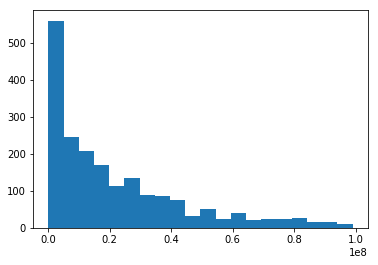

In [165]:
plt.hist(bechdel_df.loc[(bechdel_df.passing == 1) & (bechdel_df.new_budgets > 0) & (bechdel_df.new_budgets < 1e8), 'new_budgets'], bins=20);

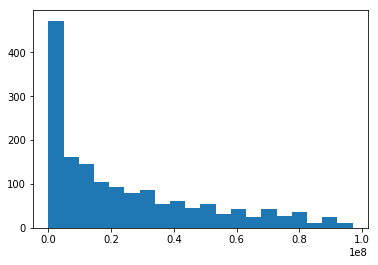

In [164]:
plt.hist(bechdel_df.loc[(bechdel_df.passing == 0) & (bechdel_df.new_budgets > 0) & (bechdel_df.new_budgets < 1e8), 'new_budgets'], bins=20);

#### Save new csv file

In [166]:
bechdel_df.to_csv('my_data/bechdel_updated_budgets', index=False)

### B. Add (some of the) missing revenue values

In [4]:
df.isnull().sum()

id                                  0
budget                              0
genres                         121529
imdb_id                         78480
original_language                 203
original_title                      1
overview                        50984
popularity                          0
production_companies                0
production_countries                0
release_date                    24046
revenue                             0
runtime                         36792
spoken_languages                 4460
status                           1988
tagline                        276113
title                               1
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
dtype: int64

In [7]:
df.dropna(subset=['imdb_id'], inplace=True)

In [8]:
df.isnull().sum()

id                                  0
budget                              0
genres                          75700
imdb_id                             0
original_language                 149
original_title                      0
overview                        30536
popularity                          0
production_companies                0
production_countries                0
release_date                     9661
revenue                             0
runtime                         20349
spoken_languages                 4012
status                           1210
tagline                        204214
title                               0
vote_average                        0
vote_count                          0
production_companies_number         0
production_countries_number         0
spoken_languages_number             0
dtype: int64

#### Dictionary of imdb ids with revenue values

In [9]:
id_revenue_dict = dict(zip(df.imdb_id, df.revenue))

In [10]:
id_revenue_dict

{'tt0094675': 0,
 'tt0092149': 0,
 'tt0113101': 4300000,
 'tt0107286': 12136938,
 'tt0825671': 0,
 'tt0425473': 0,
 'tt0076759': 775398007,
 'tt0266543': 940335536,
 'tt0109830': 677945399,
 'tt0169547': 356296601,
 'tt0033467': 23217674,
 'tt0168629': 40031879,
 'tt0411267': 0,
 'tt0119116': 263920180,
 'tt0017136': 650422,
 'tt0314412': 9726954,
 'tt0060371': 0,
 'tt0325980': 655011224,
 'tt0266697': 180949000,
 'tt0418763': 96889998,
 'tt0352994': 0,
 'tt0411705': 1574623,
 'tt0078788': 89460381,
 'tt1530535': 0,
 'tt6266826': 0,
 'tt6264824': 0,
 'tt0105695': 159157447,
 'tt0462538': 527068851,
 'tt0338013': 72258126,
 'tt0245712': 20908467,
 'tt0383574': 1065659812,
 'tt0399146': 60740827,
 'tt0062622': 68700000,
 'tt0114746': 168840000,
 'tt0287467': 51001550,
 'tt0298203': 215000000,
 'tt0118548': 50068310,
 'tt0445620': 3357075,
 'tt0088846': 0,
 'tt0358273': 186438883,
 'tt0405159': 216763646,
 'tt0249462': 110000000,
 'tt0120586': 23875127,
 'tt0407304': 591739379,
 'tt011699

#### Create new revenue value list

In [13]:
bechdel_df = pd.read_csv('my_data/bechdel_updated_budgets.csv')
bechdel_df.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,Alita: Battle Angel,170000000.0,359700000.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2019.0,Close,3.0,1.0,tt5316540,Close,NaN,NaN,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,Cold Pursuit,NaN,NaN,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
bechdel_df.isnull().sum()

year                  0
title                 0
score                 0
passing               0
imdb_id               0
movieTitle          456
budgetAmount       6973
boxofficeAmount    6818
imdbId              456
director_fnbt       456
writer_fnbt         456
exec_fnbt           456
producer_fnbt       456
overall_fnbt        456
new_budgets           0
dtype: int64

In [16]:
len(bechdel_df.loc[bechdel_df.new_budgets != 0])

3940

In [18]:
import numpy as np

#### Create new revenue list and add to Bechdel df

In [19]:
new_revenue_list = []
for imdb_id, revenue in zip(bechdel_df.imdb_id, bechdel_df.boxofficeAmount):
    if not np.isnan(revenue):
        new_revenue_list.append(revenue)
    elif imdb_id in id_revenue_dict.keys():
        new_revenue_list.append(id_revenue_dict[imdb_id])
    else:
        new_revenue_list.append(0)
len(new_revenue_list), new_revenue_list

(8089,
 [359700000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  259168321.0,
  340939361.0,
  42600000.0,
  403588149.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  622674139.0,
  0,
  1138890756.0,
  0,
  678815482.0,
  0,
  0,
  0,
  0,
  1346913161.0,
  0,
  0,
  0,
  870200000.0,
  0,
  459500000.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  238500000.0,
  213400000.0,
  0,
  0,
  785046920.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  653400000.0,
  0,
  0,
  0,
  0,
  0,
  85500000.0,
  0,
  0,
  0,
  253700000.0,
  0,
  0,
  0,
  79275328.0,
  0,
  0,
  66900000.0,
  0,
  0,
  0,
  0,
  0,
  1309500000.0,
  0,
  0,
  0,
  0,
  7200000.0,
  0,
  0,
  0,
  394700000.0,
  0,
  0,
  0,
  0,
  288261741.0,
  530243742.0,
  0,
  0,
  791017452.0,
  0,
  0,
  0,
  0,
  0,
  0,
  100385760.0,
  297718711.0,
  0,
  0,
  0,
  288393630.0,
  0,
  0,
  0,
  0,
  0,
  0,
  97800102.0,
  428028233.0,
  581886514.0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  

In [20]:
bechdel_df['new_revenue'] = new_revenue_list

In [21]:
bechdel_df.head()

,year,title,score,passing,imdb_id,movieTitle,budgetAmount,boxofficeAmount,imdbId,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,Alita: Battle Angel,170000000.0,359700000.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,Close,NaN,NaN,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,Cold Pursuit,NaN,NaN,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [22]:
len(bechdel_df.loc[bechdel_df.new_revenue != 0])

3848

In [23]:
bechdel_df.isnull().sum()

year                  0
title                 0
score                 0
passing               0
imdb_id               0
movieTitle          456
budgetAmount       6973
boxofficeAmount    6818
imdbId              456
director_fnbt       456
writer_fnbt         456
exec_fnbt           456
producer_fnbt       456
overall_fnbt        456
new_budgets           0
new_revenue           0
dtype: int64

In [24]:
cols_to_drop = ['movieTitle', 'budgetAmount', 'boxofficeAmount', 'imdbId']
bechdel_df.drop(cols_to_drop, axis=1, inplace=True)

In [25]:
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [26]:
bechdel_df.isnull().sum()

year               0
title              0
score              0
passing            0
imdb_id            0
director_fnbt    456
writer_fnbt      456
exec_fnbt        456
producer_fnbt    456
overall_fnbt     456
new_budgets        0
new_revenue        0
dtype: int64

In [27]:
bechdel_df.shape

(8089, 12)

In [28]:
bechdel_df.to_csv('my_data/updated_bechdel_with_budget_and_revenue.csv', index=False)

## V. Add information from Movies Metadata

In [29]:
movies_metadata = pd.read_csv('other_data/movies_metadata.csv')
movies_metadata.head()

/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [30]:
movies_metadata.isnull().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [32]:
movies_metadata.dropna(subset=['imdb_id'], inplace=True)

In [33]:
movies_metadata.loc[movies_metadata.revenue.isna()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19729,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,82663,tt0113002,en,Midnight Man,British soldiers force a recently captured IRA...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",1997-08-20,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29502,False,"{'id': 122661, 'name': 'Mardock Scramble Colle...",0,"[{'id': 16, 'name': 'Animation'}, {'id': 878, ...",http://m-scramble.jp/exhaust/,122662,tt2423504,ja,マルドゥック・スクランブル 排気,Third film of the Mardock Scramble series.,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",2012-09-29,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35586,False,NaN,0,"[{'id': 10770, 'name': 'TV Movie'}, {'id': 28,...",NaN,249260,tt2622826,en,Avalanche Sharks,A group of skiers are terrorized during spring...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",2014-01-01,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
bechdel_df.loc[bechdel_df.title == 'Midnight Man']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenue


In [35]:
bechdel_df.loc[bechdel_df.title == 'Avalanche Sharks']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenue


In [36]:
movies_metadata.dropna(subset=['revenue'], inplace=True)

In [37]:
movies_metadata.isna().sum()

adult                        0
belongs_to_collection    40955
budget                       0
genres                       0
homepage                 37666
id                           0
imdb_id                      0
original_language           11
original_title               0
overview                   952
popularity                   0
poster_path                378
production_companies         0
production_countries         0
release_date                81
revenue                      0
runtime                    255
spoken_languages             0
status                      81
tagline                  25035
title                        0
video                        0
vote_average                 0
vote_count                   0
dtype: int64

In [38]:
len(movies_metadata.loc[movies_metadata.budget != 0])

45443

In [39]:
len(movies_metadata.loc[movies_metadata.revenue != 0])

7408

#### Create budget and revenue dictionaries to add to Bechdel df

In [42]:
movies_metadata.budget = movies_metadata.budget.astype('float')

In [43]:
imdb_budget_dict = dict(zip(movies_metadata.imdb_id, movies_metadata.budget))
imdb_budget_dict

{'tt0114709': 30000000.0,
 'tt0113497': 65000000.0,
 'tt0113228': 0.0,
 'tt0114885': 16000000.0,
 'tt0113041': 0.0,
 'tt0113277': 60000000.0,
 'tt0114319': 58000000.0,
 'tt0112302': 0.0,
 'tt0114576': 35000000.0,
 'tt0113189': 58000000.0,
 'tt0112346': 62000000.0,
 'tt0112896': 0.0,
 'tt0112453': 0.0,
 'tt0113987': 44000000.0,
 'tt0112760': 98000000.0,
 'tt0112641': 52000000.0,
 'tt0114388': 16500000.0,
 'tt0113101': 4000000.0,
 'tt0112281': 30000000.0,
 'tt0113845': 60000000.0,
 'tt0113161': 30250000.0,
 'tt0112722': 0.0,
 'tt0112401': 50000000.0,
 'tt0114168': 0.0,
 'tt0113627': 3600000.0,
 'tt0114057': 0.0,
 'tt0114011': 12000000.0,
 'tt0114117': 0.0,
 'tt0112682': 18000000.0,
 'tt0115012': 0.0,
 'tt0112792': 0.0,
 'tt0114746': 29500000.0,
 'tt0114952': 0.0,
 'tt0112431': 30000000.0,
 'tt0112637': 0.0,
 'tt0112818': 11000000.0,
 'tt0112286': 0.0,
 'tt0113442': 0.0,
 'tt0112697': 12000000.0,
 'tt0112749': 0.0,
 'tt0114279': 0.0,
 'tt0112819': 10000000.0,
 'tt0114272': 19000000.0,
 't

In [45]:
updated_budgets = []
for imdb_id, budget in zip(bechdel_df.imdb_id, bechdel_df.new_budgets):
    if budget != 0:
        updated_budgets.append(budget)
    elif imdb_id in imdb_budget_dict.keys():
        updated_budgets.append(imdb_budget_dict[imdb_id])
    else:
        updated_budgets.append(0)
        
updated_budgets

[170000000.0,
 0,
 0,
 0,
 0,
 0,
 10000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17000000.0,
 17000000.0,
 0,
 36000000.0,
 100000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 200000000.0,
 0,
 400000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 10000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 110000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 37000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 32000000.0,
 0,
 0,
 0,
 0,
 0,
 170000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 17000000.0,
 0,
 19116000.0,
 0,
 0,
 0,
 62000000.0,
 130000000.0,
 0,
 0,
 178000000.0,
 100000000.0,
 0,
 0,
 0,
 0,
 0,
 70000000.0,
 70000000.0,
 0,
 0,
 0,
 150000000.0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 120000000.0,
 120000000.0,
 175000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 250000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 94000000.0,
 0,
 0,
 140000000.0,
 0,
 10000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 5500000.0,
 0,
 0,
 0,
 22000000.0,
 100000.0,
 0,
 0,
 500000.0,
 97000000.0,
 45000

In [46]:
bechdel_df['updated_budgets'] = updated_budgets
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenue,updated_budgets
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0,170000000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0


In [48]:
len(bechdel_df.loc[bechdel_df.updated_budgets != 0])

4009

In [52]:
len(bechdel_df.loc[bechdel_df.new_budgets != 0])

3940

In [50]:
movies_metadata.revenue.head()

0    373554033.0
1    262797249.0
2            0.0
3     81452156.0
4     76578911.0
Name: revenue, dtype: float64

In [51]:
imdb_revenue_dict = dict(zip(movies_metadata.imdb_id, movies_metadata.revenue))
imdb_revenue_dict

{'tt0114709': 373554033.0,
 'tt0113497': 262797249.0,
 'tt0113228': 0.0,
 'tt0114885': 81452156.0,
 'tt0113041': 76578911.0,
 'tt0113277': 187436818.0,
 'tt0114319': 0.0,
 'tt0112302': 0.0,
 'tt0114576': 64350171.0,
 'tt0113189': 352194034.0,
 'tt0112346': 107879496.0,
 'tt0112896': 0.0,
 'tt0112453': 11348324.0,
 'tt0113987': 13681765.0,
 'tt0112760': 10017322.0,
 'tt0112641': 116112375.0,
 'tt0114388': 135000000.0,
 'tt0113101': 4300000.0,
 'tt0112281': 212385533.0,
 'tt0113845': 35431113.0,
 'tt0113161': 115101622.0,
 'tt0112722': 0.0,
 'tt0112401': 30303072.0,
 'tt0114168': 0.0,
 'tt0113627': 49800000.0,
 'tt0114057': 0.0,
 'tt0114011': 27400000.0,
 'tt0114117': 0.0,
 'tt0112682': 1738611.0,
 'tt0115012': 0.0,
 'tt0112792': 180000000.0,
 'tt0114746': 168840000.0,
 'tt0114952': 0.0,
 'tt0112431': 254134910.0,
 'tt0112637': 0.0,
 'tt0112818': 39363635.0,
 'tt0112286': 0.0,
 'tt0113442': 0.0,
 'tt0112697': 0.0,
 'tt0112749': 676525.0,
 'tt0114279': 0.0,
 'tt0112819': 0.0,
 'tt0114272'

In [53]:
updated_revenue = []
for imdb_id, revenue in zip(bechdel_df.imdb_id, bechdel_df.new_revenue):
    if revenue != 0:
        updated_revenue.append(revenue)
    elif imdb_id in imdb_revenue_dict.keys():
        updated_revenue.append(imdb_revenue_dict[imdb_id])
    else:
        updated_revenue.append(0)
        
updated_revenue

[359700000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 259168321.0,
 340939361.0,
 42600000.0,
 403588149.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 622674139.0,
 0,
 1138890756.0,
 0,
 678815482.0,
 0,
 0,
 0,
 0,
 1346913161.0,
 0,
 0,
 0,
 870200000.0,
 0,
 459500000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 238500000.0,
 213400000.0,
 0,
 0,
 785046920.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 653400000.0,
 0,
 0,
 0,
 0,
 0,
 85500000.0,
 0,
 0,
 0,
 253700000.0,
 0,
 0,
 0,
 79275328.0,
 0,
 0,
 66900000.0,
 0,
 0,
 0,
 0,
 0,
 1309500000.0,
 0,
 0,
 0,
 0,
 7200000.0,
 0,
 0,
 0,
 394700000.0,
 0,
 0,
 0,
 0,
 288261741.0,
 530243742.0,
 0,
 0,
 791017452.0,
 0,
 0,
 0,
 0,
 0,
 0,
 100385760.0,
 297718711.0,
 0,
 0,
 0,
 288393630.0,
 0,
 0.0,
 0,
 0,
 0,
 0,
 97800102.0,
 428028233.0,
 581886514.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 25840047.0,
 0,
 363800000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 273521715.0,
 0,
 0,
 855000000.0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 44235023.0,
 0,


In [54]:
bechdel_df['updated_revenue'] = updated_revenue
bechdel_df.tail()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenue,updated_budgets,updated_revenue
8084,1896.0,Une nuit terrible,0.0,0.0,tt0000131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8085,1895.0,"The Execution of Mary, Queen of Scots",0.0,0.0,tt0132134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8086,1895.0,Tables Turned on the Gardener,0.0,0.0,tt0000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8087,1892.0,Pauvre Pierrot,0.0,0.0,tt0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,1888.0,Roundhay Garden Scene,0.0,0.0,tt0392728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
len(bechdel_df.loc[bechdel_df.new_revenue != 0])

3848

In [56]:
len(bechdel_df.loc[bechdel_df.updated_revenue != 0])

3956

In [59]:
bechdel_df[2100:2150]

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenue,updated_budgets,updated_revenue
2100,2012.0,Sushi Girl,0.0,0.0,tt1606339,0.0,0.0,0.0,0.0,0.0,750000.0,0.0,750000.0,0.0
2101,2012.0,The Swing,3.0,1.0,tt2504614,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2102,2012.0,Tabu,3.0,1.0,tt2153963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2103,2012.0,Tad: The Lost Explorer,1.0,0.0,tt1764625,0.0,0.0,0.0,0.0,0.0,8000000.0,68000000.0,8000000.0,68000000.0
2104,2012.0,Taken 2,2.0,0.0,tt1397280,0.0,0.0,0.0,0.0,0.0,0.0,376100000.0,45000000.0,376100000.0
2105,2012.0,The Tall Man,3.0,1.0,tt1658837,0.0,0.0,1.0,0.0,1.0,18200000.0,5212903.0,18200000.0,5212903.0
2106,2012.0,Tango libre,0.0,0.0,tt2370034,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2107,2012.0,Tears of Steel,0.0,0.0,tt2285752,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2108,2012.0,Ted,2.0,0.0,tt1637725,0.0,0.0,0.0,0.0,0.0,50000000.0,549400000.0,50000000.0,549400000.0
2109,2012.0,That's My Boy,1.0,0.0,tt1232200,0.0,0.0,0.0,1.0,1.0,70000000.0,58058367.0,70000000.0,58058367.0


In [60]:
bechdel_df.drop(columns=['new_budgets', 'new_revenue'], axis=1, inplace=True)
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,updated_budgets,updated_revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [61]:
bechdel_df.to_csv('my_data/updated_bechdel_2.csv', index=False)

## VI. Add information from TMDb API

In [2]:
bechdel_df = pd.read_csv('my_data/updated_bechdel_2.csv')
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,updated_budgets,updated_revenue
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,0.0,0.0


#### Add budget values

In [3]:
api_budgets = pd.read_csv('my_data/budget_data_from_api.csv')
api_budgets.head()

,Unnamed: 0,0
0,tt0437086,170000000
1,tt9109492,0
2,tt5316540,0
3,tt5719748,0
4,tt2386490,129000000


In [7]:
api_budgets.columns

Index(['Unnamed: 0', '0'], dtype='object')

In [9]:
api_budget_dict = dict(zip(api_budgets['Unnamed: 0'], api_budgets['0']))

In [10]:
api_budget_dict

{'tt0437086': 170000000,
 'tt9109492': 0,
 'tt5316540': 0,
 'tt5719748': 0,
 'tt2386490': 129000000,
 'tt6811018': 0,
 'tt3513498': 10000000,
 'tt4139588': 0,
 'tt6476140': 25000000,
 'tt6078866': 0,
 'tt7605074': 48000000,
 'tt9358120': 0,
 'tt6142496': 0,
 'tt2368254': 0,
 'tt6644200': 17000000,
 'tt7040874': 20000000,
 'tt1517451': 36000000,
 'tt1620680': 103000000,
 'tt5688996': 0,
 'tt4244998': 51000000,
 'tt6212478': 3000000,
 'tt8020896': 0,
 'tt6776106': 0,
 'tt2798920': 40000000,
 'tt5095030': 140000000,
 'tt6217306': 0,
 'tt1477834': 160000000,
 'tt7156222': 0,
 'tt4154756': 300000000,
 'tt6412452': 0,
 'tt7545524': 13000000,
 'tt2737304': 19800000,
 'tt1825683': 200000000,
 'tt7349662': 15000000,
 'tt7242142': 0,
 'tt2531344': 21000000,
 'tt1727824': 52000000,
 'tt6857166': 10000000,
 'tt4701182': 135000000,
 'tt7282468': 7080000,
 'tt8361028': 0,
 'tt4595882': 0,
 'tt7485508': 0,
 'tt4575576': 75000000,
 'tt2548396': 10000000,
 'tt6543652': 4954000,
 'tt5437928': 0,
 'tt310

In [11]:
updated_budgets = []
for imdb_id, budget in zip(bechdel_df.imdb_id, bechdel_df.updated_budgets):
    if budget != 0:
        updated_budgets.append(budget)
    elif imdb_id in api_budget_dict.keys():
        updated_budgets.append(api_budget_dict[imdb_id])
    else:
        updated_budgets.append(0)
        
updated_budgets

[170000000.0,
 0,
 0,
 0,
 129000000,
 0,
 10000000.0,
 0,
 25000000,
 0,
 48000000,
 0,
 0,
 0,
 17000000.0,
 17000000.0,
 20000000,
 36000000.0,
 100000000.0,
 0,
 51000000,
 3000000,
 0,
 0,
 40000000,
 140000000,
 0,
 200000000.0,
 0,
 400000000.0,
 0,
 0,
 13000000,
 19800000,
 200000000,
 15000000,
 0,
 21000000,
 52000000,
 10000000,
 135000000,
 7080000,
 0,
 0,
 0,
 75000000,
 10000000.0,
 4954000,
 0,
 30000000,
 50000000,
 34000000,
 0,
 110000000.0,
 0,
 0,
 0,
 50000000,
 0,
 0,
 0,
 200000000,
 15000000,
 70000000,
 0,
 13000000,
 0,
 37000000.0,
 43000000,
 23000000,
 0,
 10000000,
 23000000,
 2000000,
 0,
 10000000,
 0,
 42000000,
 32000000.0,
 0,
 200000000,
 62770198,
 0,
 25000000,
 170000000.0,
 0,
 0,
 0,
 0,
 0,
 30000000,
 0,
 17000000.0,
 75000000,
 19116000.0,
 6000000,
 130000000,
 25000000,
 62000000.0,
 130000000.0,
 0,
 900000,
 178000000.0,
 100000000.0,
 50000000,
 0,
 0,
 0,
 120000000,
 70000000.0,
 70000000.0,
 0,
 0,
 12000000,
 150000000.0,
 0,
 0,
 

In [12]:
bechdel_df['new_budgets'] = updated_budgets
bechdel_df.tail()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,updated_budgets,updated_revenue,new_budgets
8084,1896.0,Une nuit terrible,0.0,0.0,tt0000131,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8085,1895.0,"The Execution of Mary, Queen of Scots",0.0,0.0,tt0132134,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8086,1895.0,Tables Turned on the Gardener,0.0,0.0,tt0000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8087,1892.0,Pauvre Pierrot,0.0,0.0,tt0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,1888.0,Roundhay Garden Scene,0.0,0.0,tt0392728,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
# with api info
len(bechdel_df.loc[bechdel_df.new_budgets != 0])

4227

In [17]:
# old count
len(bechdel_df.loc[bechdel_df.updated_budgets != 0])

4009

#### Add revenue information

In [15]:
api_revenues = pd.read_csv('my_data/revenue_data_from_api.csv')
api_revenues.head()

,Unnamed: 0,0
0,tt0437086,382817912
1,tt9109492,0
2,tt5316540,0
3,tt5719748,0
4,tt2386490,375396270


In [16]:
api_revenue_dict = dict(zip(api_revenues['Unnamed: 0'], api_revenues['0']))
api_revenue_dict

{'tt0437086': 382817912,
 'tt9109492': 0,
 'tt5316540': 0,
 'tt5719748': 0,
 'tt2386490': 375396270,
 'tt6811018': 0,
 'tt3513498': 0,
 'tt4139588': 0,
 'tt6476140': 0,
 'tt6078866': 0,
 'tt7605074': 0,
 'tt9358120': 0,
 'tt6142496': 0,
 'tt2368254': 0,
 'tt6644200': 340677200,
 'tt7040874': 53542417,
 'tt1517451': 430488255,
 'tt1620680': 132675864,
 'tt5688996': 0,
 'tt4244998': 35808437,
 'tt6212478': 2847319,
 'tt8020896': 0,
 'tt6776106': 0,
 'tt2798920': 43070915,
 'tt5095030': 622379576,
 'tt6217306': 0,
 'tt1477834': 1141900148,
 'tt7156222': 0,
 'tt4154756': 2046239637,
 'tt6412452': 0,
 'tt7545524': 0,
 'tt2737304': 0,
 'tt1825683': 1346739107,
 'tt7349662': 48686605,
 'tt7242142': 0,
 'tt2531344': 93674786,
 'tt1727824': 835137710,
 'tt6857166': 78720293,
 'tt4701182': 420361283,
 'tt7282468': 6591038,
 'tt8361028': 0,
 'tt4595882': 8586944,
 'tt7485508': 0,
 'tt4575576': 99138899,
 'tt2548396': 0,
 'tt6543652': 18754051,
 'tt5437928': 0,
 'tt3104988': 237994561,
 'tt6343314

In [18]:
updated_revenues = []
for imdb_id, revenue in zip(bechdel_df.imdb_id, bechdel_df.updated_revenue):
    if revenue != 0:
        updated_revenues.append(revenue)
    elif imdb_id in api_revenue_dict.keys():
        updated_revenues.append(api_revenue_dict[imdb_id])
    else:
        updated_revenues.append(0)
        
updated_revenues

[359700000.0,
 0,
 0,
 0,
 375396270,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 259168321.0,
 340939361.0,
 42600000.0,
 403588149.0,
 132675864,
 0,
 35808437,
 2847319,
 0,
 0,
 43070915,
 622674139.0,
 0,
 1138890756.0,
 0,
 678815482.0,
 0,
 0,
 0,
 0,
 1346913161.0,
 48686605,
 0,
 93674786,
 870200000.0,
 78720293,
 459500000.0,
 6591038,
 0,
 8586944,
 0,
 99138899,
 0,
 18754051,
 0,
 238500000.0,
 213400000.0,
 41142379,
 0,
 785046920.0,
 0,
 0,
 0,
 53431158,
 13539709,
 0,
 0,
 653400000.0,
 82124805,
 100546153,
 0,
 41953945,
 0,
 85500000.0,
 17894345,
 63005401,
 0,
 253700000.0,
 29163535,
 2115765,
 0,
 79275328.0,
 0,
 29950000,
 66900000.0,
 0,
 1241891456,
 64207623,
 0,
 158256993,
 1309500000.0,
 0,
 0,
 0,
 0,
 7200000.0,
 61700416,
 0,
 60848932,
 394700000.0,
 0,
 1005909,
 320264753,
 37807625,
 288261741.0,
 530243742.0,
 6897446,
 904703,
 791017452.0,
 104236467,
 64738465,
 0,
 0,
 0,
 59522646,
 100385760.0,
 297718711.0,
 11277120,
 0,
 15425000,
 288393630.

In [20]:
bechdel_df['new_revenues'] = updated_revenues
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,updated_budgets,updated_revenue,new_budgets,new_revenues
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,0.0,0.0,129000000.0,375396270.0


In [21]:
# old count
len(bechdel_df.loc[bechdel_df.updated_revenue != 0])

3956

In [23]:
# new count
len(bechdel_df.loc[bechdel_df.new_revenues != 0])

4207

#### Drop old budget and revenue columns and save as csv

In [24]:
bechdel_df.drop(columns=['updated_budgets', 'updated_revenue'], axis=1, inplace=True)
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,129000000.0,375396270.0


In [25]:
bechdel_df.to_csv('my_data/bechdel_with_api_info.csv', index=False)

## VII. Hunt down the bad ids
* possibly do some manual labor

In [27]:
bad_ids = pd.read_csv('my_data/bad_ids_from_api_call.csv', header=None)
bad_ids.head()

,0
0,tt5861756
1,tt
2,tt
3,tt5598192
4,tt5833846


In [28]:
bechdel_df.loc[bechdel_df.imdb_id == 'tt']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
125,2018.0,Roma,3.0,1.0,tt,NaN,NaN,NaN,NaN,NaN,0.0,0.0
126,2006.0,Little man,1.0,0.0,tt,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [29]:
bad_ids.shape

(128, 1)

In [30]:
bechdel_df.isna().sum()

year               0
title              0
score              0
passing            0
imdb_id            0
director_fnbt    456
writer_fnbt      456
exec_fnbt        456
producer_fnbt    456
overall_fnbt     456
new_budgets        0
new_revenues       0
dtype: int64

In [32]:
# actual information for Roma
roma_info = [2018.0, 'Roma', 3.0, 1.0, 'tt6155172', 0.0, 0.0, 0.0, 1.0, 1.0, 15000000, 4400000]

In [33]:
bechdel_df.drop([125], axis=0, inplace=True)

In [34]:
bechdel_df[120:130]

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
120,2018.0,Ralph Breaks the Internet,3.0,1.0,tt5848272,NaN,NaN,NaN,NaN,NaN,175000000.0,473835027.0
121,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,97800102.0
122,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,428028233.0
123,2018.0,Ready Player One,3.0,1.0,tt1677720,0.0,0.0,0.0,1.0,1.0,175000000.0,581886514.0
124,2018.0,Red Sparrow,3.0,1.0,tt2873282,0.0,0.0,0.0,1.0,1.0,69000000.0,147988192.0
126,2006.0,Little man,1.0,0.0,tt,NaN,NaN,NaN,NaN,NaN,0.0,0.0
127,2018.0,Roma,3.0,1.0,tt6155172,NaN,NaN,NaN,NaN,NaN,15000000.0,0.0
128,2018.0,Searching,1.0,0.0,tt7668870,0.0,0.0,0.0,0.0,0.0,1000000.0,66265218.0
129,2018.0,Set It Up,3.0,1.0,tt5304992,0.0,0.0,0.0,0.0,0.0,0.0,0.0
130,2018.0,Sheherazade,3.0,1.0,tt8459250,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
# two Romas!
bechdel_df.drop([127], axis=0, inplace=True)

In [38]:
bechdel_df.loc[125] = roma_info

In [39]:
bechdel_df[120:128]

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
120,2018.0,Ralph Breaks the Internet,3.0,1.0,tt5848272,NaN,NaN,NaN,NaN,NaN,175000000.0,473835027.0
121,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,97800102.0
122,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,428028233.0
123,2018.0,Ready Player One,3.0,1.0,tt1677720,0.0,0.0,0.0,1.0,1.0,175000000.0,581886514.0
124,2018.0,Red Sparrow,3.0,1.0,tt2873282,0.0,0.0,0.0,1.0,1.0,69000000.0,147988192.0
126,2006.0,Little man,1.0,0.0,tt,NaN,NaN,NaN,NaN,NaN,0.0,0.0
128,2018.0,Searching,1.0,0.0,tt7668870,0.0,0.0,0.0,0.0,0.0,1000000.0,66265218.0
129,2018.0,Set It Up,3.0,1.0,tt5304992,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [40]:
bechdel_df.tail()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
8085,1895.0,"The Execution of Mary, Queen of Scots",0.0,0.0,tt0132134,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8086,1895.0,Tables Turned on the Gardener,0.0,0.0,tt0000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8087,1892.0,Pauvre Pierrot,0.0,0.0,tt0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,1888.0,Roundhay Garden Scene,0.0,0.0,tt0392728,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,2018.0,Roma,3.0,1.0,tt6155172,0.0,0.0,0.0,1.0,1.0,15000000.0,4400000.0


In [42]:
bechdel_df.loc[bechdel_df.title == 'Little man']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
126,2006.0,Little man,1.0,0.0,tt,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [43]:
bechdel_df.loc[bechdel_df.title == 'Littleman']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues


In [44]:
little_man_info = [2006.0, 'Little Man', 1.0, 0.0, 'tt0430304', 0.0, 0.0, 0.0, 0.0, 0.0, 64000000, 101600000]


In [45]:
bechdel_df.drop([126], axis=0, inplace=True)

In [46]:
bechdel_df.loc[126] = little_man_info

In [47]:
bechdel_df.tail()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
8086,1895.0,Tables Turned on the Gardener,0.0,0.0,tt0000014,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8087,1892.0,Pauvre Pierrot,0.0,0.0,tt0000003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8088,1888.0,Roundhay Garden Scene,0.0,0.0,tt0392728,0.0,0.0,0.0,0.0,0.0,0.0,0.0
125,2018.0,Roma,3.0,1.0,tt6155172,0.0,0.0,0.0,1.0,1.0,15000000.0,4400000.0
126,2006.0,Little Man,1.0,0.0,tt0430304,0.0,0.0,0.0,0.0,0.0,64000000.0,101600000.0


In [48]:
bad_ids.head()

,0
0,tt5861756
1,tt
2,tt
3,tt5598192
4,tt5833846


In [49]:
bad_ids.drop([1,2], axis=0, inplace=True)

In [50]:
bad_ids.head()

,0
0,tt5861756
3,tt5598192
4,tt5833846
5,tt7341676
6,tt6524480


In [52]:
bad_ids_list = bad_ids[0].values

In [53]:
bad_ids_list

array(['tt5861756', 'tt5598192', 'tt5833846', 'tt7341676', 'tt6524480',
       'tt5675620', 'tt5997830', 'tt4956232', 'tt4270492', 'tt4869556',
       'tt4644822', 'tt5709236', 'tt5022298', 'tt6220550', 'tt2938496',
       'tt5580664', 'tt4000768', 'tt4108134', 'tt4498966', 'tt4895704',
       'tt6663788', 'tt4780834', 'tt2431438', 'tt4858280', 'tt2742544',
       'tt3749900', 'tt3638604', 'tt4211680', 'tt3566726', 'tt3457342',
       'tt3630276', 'tt2964334', 'tt3448098', 'tt2294189', 'tt2991316',
       'tt2309295', 'tt1856010', 'tt191181', 'tt2628260', 'tt2520512',
       'tt2407574', 'tt2234222', 'tt3066242', 'tt2255372', 'tt3061046',
       'tt1864750', 'tt2306299', 'tt2542420', 'tt2387222', 'tt2275990',
       'tt2191671', 'tt2294076', 'tt2262308', 'tt2243973', 'tt2592512',
       'tt2392261', 'tt1976633', 'tt598828', 'tt2504614', 'tt2285752',
       'tt3100510', 'tt2435166', 'tt2678152', 'tt1319708', 'tt1872328',
       'tt1492030', 'tt1843678', 'tt1604225', 'tt1219817', 'tt1578

In [56]:
bechdel_bad_ids = bechdel_df[bechdel_df.imdb_id.isin(bad_ids_list)]

In [57]:
bechdel_bad_ids

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
31,2018.0,Bella Ciao!,3.0,1.0,tt5861756,NaN,NaN,NaN,NaN,NaN,0.0,0.0
271,2017.0,Innan vi dor,3.0,1.0,tt5598192,0.0,0.0,0.0,0.0,0.0,0.0,0.0
302,2017.0,Maximilian,2.0,0.0,tt5833846,NaN,NaN,NaN,NaN,NaN,0.0,0.0
324,2017.0,OM+ME,3.0,1.0,tt7341676,NaN,NaN,NaN,NaN,NaN,0.0,0.0
334,2017.0,Plasmatic Day,1.0,0.0,tt6524480,NaN,NaN,NaN,NaN,NaN,0.0,0.0
340,2017.0,The Punisher,3.0,1.0,tt5675620,1.0,1.0,0.0,0.0,2.0,0.0,0.0
347,2017.0,Seagull,3.0,1.0,tt5997830,NaN,NaN,NaN,NaN,NaN,0.0,0.0
348,2017.0,seven sisters,3.0,1.0,tt4956232,NaN,NaN,NaN,NaN,NaN,0.0,0.0
435,2016.0,Billions,3.0,1.0,tt4270492,NaN,NaN,NaN,NaN,NaN,0.0,0.0
442,2016.0,Breathing Deep,1.0,0.0,tt4869556,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [61]:
# oh man, there are some TV shows in this! ugh

### A. Drop TV shows

In [2]:
bechdel_df = pd.read_csv('my_data/bechdel_with_api_info.csv')
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,129000000.0,375396270.0


In [3]:
bad_ids = pd.read_csv('my_data/api_detective_work.csv')
bad_ids.head()

,NOTHING,tv_shows,not_tv_shows
0,NaN,tt5598192,tt5861756
1,NaN,tt5833846,tt7341676
2,NaN,tt5675620,tt6524480
3,NaN,tt4270492,tt5997830
4,NaN,tt4644822,tt4956232


In [4]:
import numpy as np

In [5]:
tv_show_ids = bad_ids.tv_shows.values
tv_show_ids

array(['tt5598192', 'tt5833846', 'tt5675620', 'tt4270492', 'tt4644822',
       'tt5022298', 'tt6220550', 'tt5580664', 'tt4108134', 'tt2431438',
       'tt3749900', 'tt3566726', 'tt2294189', 'tt2309295', 'tt1856010',
       'tt2520512', 'tt2407574', 'tt2234222', 'tt3066242', 'tt3061046',
       'tt1864750', 'tt2306299', 'tt2275990', 'tt2191671', 'tt2294076',
       'tt2262308', 'tt2243973', 'tt1872328', 'tt1492030', 'tt1843678',
       'tt1219817', 'tt1578873', 'tt1442437', 'tt1199099', 'tt1356380',
       'tt0493093', 'tt0491738', 'tt0423651', 'tt0413573', 'tt0756522',
       'tt0417349', 'tt0318997', 'tt0348913', 'tt0259153', 'tt0185906',
       'tt2321187', 'tt0142032', 'tt0182576', 'tt0205214', 'tt0135659',
       'tt0215364', 'tt0120756', 'tt0112040', 'tt0112130', 'tt0108941',
       'tt0107099', 'tt0099864', 'tt0098897', 'tt0098032', 'tt0086739',
       'tt0078509', 'tt0072500', 'nothing', 'nothing', 'nothing'],
      dtype=object)

In [15]:
offending_indices = np.where(bechdel_df.imdb_id.isin(tv_show_ids))
offending_indices

(array([ 271,  302,  340,  435,  486,  532,  547,  683,  863,  936, 1152,
        1194, 1514, 1562, 1570, 1645, 1657, 1676, 1712, 1733, 1748, 1763,
        1846, 1895, 1927, 1937, 1939, 2276, 2363, 2422, 2627, 2736, 3063,
        3334, 3348, 3803, 3881, 4003, 4014, 4053, 4273, 4346, 4372, 4615,
        4679, 4829, 4874, 5022, 5045, 5077, 5101, 5169, 5526, 5543, 5657,
        5706, 5950, 5966, 6033, 6356, 6612, 6722]),)

In [16]:
offending_indices[0]

array([ 271,  302,  340,  435,  486,  532,  547,  683,  863,  936, 1152,
       1194, 1514, 1562, 1570, 1645, 1657, 1676, 1712, 1733, 1748, 1763,
       1846, 1895, 1927, 1937, 1939, 2276, 2363, 2422, 2627, 2736, 3063,
       3334, 3348, 3803, 3881, 4003, 4014, 4053, 4273, 4346, 4372, 4615,
       4679, 4829, 4874, 5022, 5045, 5077, 5101, 5169, 5526, 5543, 5657,
       5706, 5950, 5966, 6033, 6356, 6612, 6722])

In [18]:
bechdel_no_tv_shows = bechdel_df.drop(offending_indices[0], axis=0)

In [19]:
bechdel_no_tv_shows.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
3,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,129000000.0,375396270.0


In [20]:
bechdel_no_tv_shows.isnull().sum()

year               0
title              0
score              0
passing            0
imdb_id            0
director_fnbt    446
writer_fnbt      446
exec_fnbt        446
producer_fnbt    446
overall_fnbt     446
new_budgets        0
new_revenues       0
dtype: int64

In [23]:
# Check that the TV show The Punisher is gone
bechdel_no_tv_shows.loc[bechdel_no_tv_shows.title == 'The Punisher']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
4288,2004.0,The Punisher,1.0,0.0,tt0330793,0.0,0.0,0.0,1.0,1.0,33000000.0,54700105.0


In [24]:
bad_ids.not_tv_shows.values

array(['tt5861756', 'tt7341676', 'tt6524480', 'tt5997830', 'tt4956232',
       'tt4869556', 'tt5709236', 'tt2938496', 'tt4000768', 'tt4498966',
       'tt4895704', 'tt6663788', 'tt4780834', 'tt4858280', 'tt2742544',
       'tt3638604', 'tt4211680', 'tt3457342', 'tt3630276', 'tt2964334',
       'tt3448098', 'tt2991316', 'tt191181', 'tt2628260', 'tt2255372',
       'tt2542420', 'tt2387222', 'tt2592512', 'tt2392261', 'tt1976633',
       'tt598828', 'tt2504614', 'tt2285752', 'tt3100510', 'tt2435166',
       'tt2678152', 'tt1319708', 'tt1604225', 'tt1648133', 'tt1340768',
       'tt1479163', 'tt1521783', 'tt1326956', 'tt1648194', 'tt1461305',
       'tt1263772', 'tt1340664', 'tt420238', 'tt1095573', 'tt00293564',
       'tt1273816', 'tt0492571', 'tt0367462', 'tt0339882', 'tt0257001',
       'tt0286137', 'tt0377683', 'tt0170817', 'tt0098675', 'tt5739786',
       'tt0188484', 'tt53285', 'tt0028000', 'tt0377995', 'nothing'],
      dtype=object)

In [25]:
under_suspicion = bechdel_no_tv_shows[bechdel_no_tv_shows.imdb_id.isin(bad_ids.not_tv_shows.values)]
under_suspicion

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
31,2018.0,Bella Ciao!,3.0,1.0,tt5861756,NaN,NaN,NaN,NaN,NaN,0.0,0.0
324,2017.0,OM+ME,3.0,1.0,tt7341676,NaN,NaN,NaN,NaN,NaN,0.0,0.0
334,2017.0,Plasmatic Day,1.0,0.0,tt6524480,NaN,NaN,NaN,NaN,NaN,0.0,0.0
347,2017.0,Seagull,3.0,1.0,tt5997830,NaN,NaN,NaN,NaN,NaN,0.0,0.0
348,2017.0,seven sisters,3.0,1.0,tt4956232,NaN,NaN,NaN,NaN,NaN,0.0,0.0
442,2016.0,Breathing Deep,1.0,0.0,tt4869556,NaN,NaN,NaN,NaN,NaN,0.0,0.0
517,2016.0,Hated in the Nation,3.0,1.0,tt5709236,0.0,0.0,0.0,0.0,0.0,0.0,0.0
680,2016.0,Vampires In Virginia,3.0,1.0,tt2938496,NaN,NaN,NaN,NaN,NaN,0.0,0.0
845,2015.0,L'antiquaire,3.0,1.0,tt4000768,0.0,0.0,0.0,0.0,0.0,0.0,0.0
896,2015.0,The Murder Pact,3.0,1.0,tt4498966,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [39]:
under_suspicion.iloc[53:]

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
4410,2003.0,It's Better to Be Wanted for Murder Than Not t...,1.0,0.0,tt0339882,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4929,2000.0,Pokemon: The Movie 2000,3.0,1.0,tt0257001,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4948,2000.0,Something Between Us,3.0,1.0,tt0286137,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5361,1996.0,Connie Gomper & the Pack,0.0,0.0,tt0377683,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5669,1993.0,"""The X-Files"" Pilot",3.0,1.0,tt0170817,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6189,1987.0,The Wonderful Wizard of Oz,3.0,1.0,tt0098675,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6293,1985.0,La Negrita: the Miracle of Our Lady of Los Ang...,1.0,0.0,tt5739786,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6904,1970.0,Carry It On,3.0,1.0,tt0188484,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7278,1959.0,Sleeping Beauty,3.0,1.0,tt53285,NaN,NaN,NaN,NaN,NaN,0.0,0.0
7806,1936.0,Murder at Glen Athol,3.0,1.0,tt0028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### IMDB ids to drop

In [50]:
# some of these I can see are Black Mirror episodes, so wouldn't have shown up on TMDB API as a TV SHOW
imdb_ids_to_drop = ['tt7341676', 'tt5709236', 'tt2742544', 'tt3457342', 'tt2964334', 'tt3448098', 'tt2255372', 'tt2542420', 'tt2392261', 'tt1319708', 'tt1604225', 'tt1340768', 'tt1326956', 'tt420238', 'tt1095573', 'tt0492571', 'tt0339882', 'tt0257001', 'tt0170817', 'tt0098675', 'tt0188484', 'tt53285']

In [51]:
len(imdb_ids_to_drop)

22

#### Info to Add

In [43]:
slightly_more_accurate_list = [[2000.0, 'Something Between Us', 3.0, 1.0, 'tt0286137', 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
                               [1996.0, 'Connie Gomper & the Pack', 0.0, 0.0, 'tt0377683', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                               [1987.0, 'The Wonderful Wizard of Oz', 3.0, 1.0, 'tt0094337', 0.0, 0.0, 1.0, 1.0, 2.0, 0.0, 0.0],
                               [1985.0, 'La Negrita: The Miracle of Our Lady of Los Angeles', 1.0, 0.0, 'tt5739786', 0.0, 1.0, 1.0, 1.0, 3.0, 50000, 0.0],
                               [1959.0, 'Sleeping Beauty', 3.0, 1.0, 'tt0053285', 0.0, 0.0, 0.0, 0.0, 0.0, 6000000, 51600000],
                               [1936.0, 'Murder at Glen Athol', 3.0, 1.0, 'tt0028000', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
                               [1900.0, 'Grandma Threading Her Needle', 0.0, 0.0, 'tt0377995', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]]

In [44]:
slightly_2 = [[2012.0, 'The Happy Caterpillars', 1.0, 0.0, 'tt2592512', 0.0, 0.0, 0.0, 1.0, 1.0, 12000, 0.0],
              [2012.0, 'The Occupants', 0.0, 0.0, 'tt1976633', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [2012.0, 'One for the Money', 3.0, 1.0, 'tt598828', 1.0, 1.0, 1.0, 1.0, 4.0, 0.0, 0.0],
              [2012.0, 'The Swing', 3.0, 1.0, 'tt2504614', 1.0, 1.0, 0.0, 1.0, 3.0, 13278, 0.0],
              [2012.0, 'Tears of Steel', 0.0, 0.0, 'tt2285752', 0.0, 0.0, 0.0, 0.0, 0.0, 398000, 0.0],
              [2012.0, 'Warpaint', 0.0, 0.0, 'tt3100510', 0.0, 0.0, 1.0, 0.0, 1.0, 3000, 0.0],
              [2012.0, 'White Alligator', 3.0, 1.0, 'tt2435166', 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0],
              [2012.0, 'Wireboy', 1.0, 0.0, 'tt2678152', 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0],
              [2010.0, 'XXXHoliC: Ro', 3.0, 1.0, 'tt1648133', 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [2009.0, 'Big Font. Large Spacing', 3.0, 1.0, 'tt1479163', 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
              [2009.0, 'Exit 117', 2.0, 0.0, 'tt1521783', 0.0, 0.0, 0.0, 1.0, 1.0, 850, 0.0],
              [2009.0, 'The Wrong House', 3.0, 1.0, 'tt1648194', 0.0, 1.0, 0.0, 1.0, 2.0, 10000, 0.0],
              [2009.0, 'XXXHOLiC: Shunmuki-Kouhen', 3.0, 1.0, 'tt1461305', 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [2009.0, 'XXXHOLiC: Zenpen', 3.0, 1.0, 'tt1263772', 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [2008.0, 'Kenna', 3.0, 1.0, 'tt1340664', 0.0, 0.0, 0.0, 0.0, 0.0, 15000, 0.0],
              [2008.0, 'The Tale of Despereaux', 3.0, 1.0, 'tt0420238', 0.0, 0.0, 0.0, 1.0, 1.0, 60000000, 86900000],
              [2007.0, 'Rush Hour 3', 1.0, 0.0, 'tt00293564', 0.0, 0.0, 0.0, 0.0, 0.0, 140000000, 258000000],
              [2006.0, 'The University of Illinois vs. a Mummy', 3.0, 1.0, 'tt1273816', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [2004.0, 'Say Yes Quickly', 3.0, 1.0, 'tt0367462', 0.0, 1.0, 0.0, 1.0, 2.0, 0.0, 0.0],
              [1999.0, 'Pokemon: The Movie 2000', 3.0, 1.0, 'tt0210234', 0.0, 0.0, 0.0, 1.0, 1.0, 30000000, 133900000]]

In [61]:
slightly_3 = [[2018.0, 'Bella Ciao!', 3.0, 1.0, 'tt5861756', 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [2017.0, 'Plasmatic Day', 1.0, 0.0, 'tt6524480', 0.0, 0.0, 0.0, 0.0, 0.0, 2000, 0.0],
              [2017.0, 'Seagull', 3.0, 1.0, 'tt5997830', 1.0, 1.0, 0.0, 0.0, 2.0, 1100, 0.0],
              [2017.0, 'Seven Sisters', 3.0, 1.0, 'tt4956232', 1.0, 1.0, 1.0, 1.0, 4.0, 0.0, 0.0],
              [2016.0, 'Amores Liquidos', 1.0, 0.0, 'tt4869556', 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0],
              [2016.0, 'Vampires in Virginia', 3.0, 1.0, 'tt2938496', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 379000],
              [2015.0, 'L\'antiquaire', 3.0, 1.0, 'tt4000768', 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0],
              [2015.0, 'The Murder Pact', 3.0, 1.0, 'tt4298966', 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
              [2015.0, 'Next Stop L.A.', 3.0, 1.0, 'tt4895704', 0.0, 1.0, 0.0, 0.0, 1.0, 664, 0.0],
              [2015.0, 'Psychosis', 3.0, 1.0, 'tt6663788', 0.0, 0.0, 0.0, 0.0, 0.0, 66, 0.0],
              [2015.0, 'The Reason I Shop Online', 3.0, 1.0, 'tt4780834', 0.0, 1.0, 0.0, 0.0, 0.0, 664, 0.0],
              [2015.0, 'Stitcher', 0.0, 0.0, 'tt4858280', 0.0, 0.0, 0.0, 0.0, 0.0, 66, 0.0],
              [2014.0, 'Hard Corner: Le Film', 1.0, 0.0, 'tt3638604', 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
              [2014.0, 'I Call It Love', 0.0, 0.0, 'tt4211680', 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0],
              [2014.0, 'Force Majeure', 3.0, 1.0, 'tt3630276', 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1358561],
              [2013.0, 'Future Shift', 3.0, 1.0, 'tt2991316', 1.0, 1.0, 0.0, 1.0, 3.0, 0.0, 0.0],
              [2013.0, 'The Immigrant', 3.0, 1.0, 'tt1951181', 0.0, 0.0, 0.0, 0.0, 0.0, 16000000, 5900000],
              [2013.0, 'Lost In Living', 3.0, 1.0, 'tt2628260', 1.0, 0.0, 0.0, 1.0, 2.0, 0.0, 0.0],
              [2012.0, 'All I Want Is Everything', 3.0, 1.0, 'tt2387222', 1.0, 1.0, 0.0, 0.0, 2.0, 0.0, 0.0]]

#### Check new lists for accuracy

In [62]:
for lst in slightly_3:
    print(len(lst))

12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12
12


### B. New small dataframe with updated information

In [52]:
columns = bechdel_no_tv_shows.columns

In [54]:
new_df1 = pd.DataFrame(data=slightly_more_accurate_list, columns=columns)
new_df1

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2000.0,Something Between Us,3.0,1.0,tt0286137,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1996.0,Connie Gomper & the Pack,0.0,0.0,tt0377683,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1987.0,The Wonderful Wizard of Oz,3.0,1.0,tt0094337,0.0,0.0,1.0,1.0,2.0,0.0,0.0
3,1985.0,La Negrita: The Miracle of Our Lady of Los Ang...,1.0,0.0,tt5739786,0.0,1.0,1.0,1.0,3.0,50000.0,0.0
4,1959.0,Sleeping Beauty,3.0,1.0,tt0053285,0.0,0.0,0.0,0.0,0.0,6000000.0,51600000.0
5,1936.0,Murder at Glen Athol,3.0,1.0,tt0028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1900.0,Grandma Threading Her Needle,0.0,0.0,tt0377995,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
new_df2 = pd.DataFrame(data=slightly_2, columns=columns)
new_df2

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2012.0,The Happy Caterpillars,1.0,0.0,tt2592512,0.0,0.0,0.0,1.0,1.0,12000.0,0.0
1,2012.0,The Occupants,0.0,0.0,tt1976633,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012.0,One for the Money,3.0,1.0,tt598828,1.0,1.0,1.0,1.0,4.0,0.0,0.0
3,2012.0,The Swing,3.0,1.0,tt2504614,1.0,1.0,0.0,1.0,3.0,13278.0,0.0
4,2012.0,Tears of Steel,0.0,0.0,tt2285752,0.0,0.0,0.0,0.0,0.0,398000.0,0.0
5,2012.0,Warpaint,0.0,0.0,tt3100510,0.0,0.0,1.0,0.0,1.0,3000.0,0.0
6,2012.0,White Alligator,3.0,1.0,tt2435166,1.0,1.0,0.0,1.0,3.0,0.0,0.0
7,2012.0,Wireboy,1.0,0.0,tt2678152,1.0,1.0,0.0,1.0,3.0,0.0,0.0
8,2010.0,XXXHoliC: Ro,3.0,1.0,tt1648133,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,2009.0,Big Font. Large Spacing,3.0,1.0,tt1479163,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [63]:
new_df3 = pd.DataFrame(data=slightly_3, columns=columns)
new_df3

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2018.0,Bella Ciao!,3.0,1.0,tt5861756,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2017.0,Plasmatic Day,1.0,0.0,tt6524480,0.0,0.0,0.0,0.0,0.0,2000.0,0.0
2,2017.0,Seagull,3.0,1.0,tt5997830,1.0,1.0,0.0,0.0,2.0,1100.0,0.0
3,2017.0,Seven Sisters,3.0,1.0,tt4956232,1.0,1.0,1.0,1.0,4.0,0.0,0.0
4,2016.0,Amores Liquidos,1.0,0.0,tt4869556,1.0,1.0,0.0,0.0,2.0,0.0,0.0
5,2016.0,Vampires in Virginia,3.0,1.0,tt2938496,0.0,0.0,0.0,0.0,0.0,0.0,379000.0
6,2015.0,L'antiquaire,3.0,1.0,tt4000768,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,2015.0,The Murder Pact,3.0,1.0,tt4298966,0.0,0.0,0.0,1.0,1.0,0.0,0.0
8,2015.0,Next Stop L.A.,3.0,1.0,tt4895704,0.0,1.0,0.0,0.0,1.0,664.0,0.0
9,2015.0,Psychosis,3.0,1.0,tt6663788,0.0,0.0,0.0,0.0,0.0,66.0,0.0


In [64]:
combined_dfs = pd.concat([new_df1, new_df2, new_df3])
combined_dfs

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2000.0,Something Between Us,3.0,1.0,tt0286137,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1996.0,Connie Gomper & the Pack,0.0,0.0,tt0377683,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1987.0,The Wonderful Wizard of Oz,3.0,1.0,tt0094337,0.0,0.0,1.0,1.0,2.0,0.0,0.0
3,1985.0,La Negrita: The Miracle of Our Lady of Los Ang...,1.0,0.0,tt5739786,0.0,1.0,1.0,1.0,3.0,50000.0,0.0
4,1959.0,Sleeping Beauty,3.0,1.0,tt0053285,0.0,0.0,0.0,0.0,0.0,6000000.0,51600000.0
5,1936.0,Murder at Glen Athol,3.0,1.0,tt0028000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,1900.0,Grandma Threading Her Needle,0.0,0.0,tt0377995,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0,2012.0,The Happy Caterpillars,1.0,0.0,tt2592512,0.0,0.0,0.0,1.0,1.0,12000.0,0.0
1,2012.0,The Occupants,0.0,0.0,tt1976633,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2012.0,One for the Money,3.0,1.0,tt598828,1.0,1.0,1.0,1.0,4.0,0.0,0.0


### C. Drop all ids that will be replaced

In [65]:
imdb_ids_to_drop

['tt7341676',
 'tt5709236',
 'tt2742544',
 'tt3457342',
 'tt2964334',
 'tt3448098',
 'tt2255372',
 'tt2542420',
 'tt2392261',
 'tt1319708',
 'tt1604225',
 'tt1340768',
 'tt1326956',
 'tt420238',
 'tt1095573',
 'tt0492571',
 'tt0339882',
 'tt0257001',
 'tt0170817',
 'tt0098675',
 'tt0188484',
 'tt53285']

In [73]:
imdb_ids_to_replace = []
for i in combined_dfs.imdb_id.values:
    imdb_ids_to_replace.append(i)
    
imdb_ids_to_replace

['tt0286137',
 'tt0377683',
 'tt0094337',
 'tt5739786',
 'tt0053285',
 'tt0028000',
 'tt0377995',
 'tt2592512',
 'tt1976633',
 'tt598828',
 'tt2504614',
 'tt2285752',
 'tt3100510',
 'tt2435166',
 'tt2678152',
 'tt1648133',
 'tt1479163',
 'tt1521783',
 'tt1648194',
 'tt1461305',
 'tt1263772',
 'tt1340664',
 'tt0420238',
 'tt00293564',
 'tt1273816',
 'tt0367462',
 'tt0210234',
 'tt5861756',
 'tt6524480',
 'tt5997830',
 'tt4956232',
 'tt4869556',
 'tt2938496',
 'tt4000768',
 'tt4298966',
 'tt4895704',
 'tt6663788',
 'tt4780834',
 'tt4858280',
 'tt3638604',
 'tt4211680',
 'tt3630276',
 'tt2991316',
 'tt1951181',
 'tt2628260',
 'tt2387222']

In [74]:
for i in imdb_ids_to_drop:
    imdb_ids_to_replace.append(i)

In [75]:
len(imdb_ids_to_replace)

68

In [79]:
# check for duplicates
len(set(imdb_ids_to_replace))

68

In [80]:
len(bechdel_no_tv_shows)

8027

In [84]:
sample_ids = ['tt1951181','tt2628260','tt2387222']
sample_rows = bechdel_no_tv_shows.loc[bechdel_no_tv_shows.imdb_id.isin(sample_ids)]
sample_rows

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
1631,2013.0,Lost In Living,3.0,1.0,tt2628260,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1810,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [85]:
bechdel_dropped = bechdel_no_tv_shows[~bechdel_no_tv_shows.imdb_id.isin(imdb_ids_to_replace)]

In [87]:
len(bechdel_dropped)

7965

In [88]:
bechdel_corrected = pd.concat([bechdel_dropped, combined_dfs])
bechdel_corrected.tail()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
14,2014.0,Force Majeure,3.0,1.0,tt3630276,0.0,0.0,0.0,1.0,1.0,0.0,1358561.0
15,2013.0,Future Shift,3.0,1.0,tt2991316,1.0,1.0,0.0,1.0,3.0,0.0,0.0
16,2013.0,The Immigrant,3.0,1.0,tt1951181,0.0,0.0,0.0,0.0,0.0,16000000.0,5900000.0
17,2013.0,Lost In Living,3.0,1.0,tt2628260,1.0,0.0,0.0,1.0,2.0,0.0,0.0
18,2012.0,All I Want Is Everything,3.0,1.0,tt2387222,1.0,1.0,0.0,0.0,2.0,0.0,0.0


In [89]:
bechdel_corrected.isnull().sum()

year               0
title              0
score              0
passing            0
imdb_id            0
director_fnbt    399
writer_fnbt      399
exec_fnbt        399
producer_fnbt    399
overall_fnbt     399
new_budgets        0
new_revenues       0
dtype: int64

In [90]:
null_rows = bechdel_corrected.loc[bechdel_corrected.director_fnbt.isna()]
null_rows

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
1,2019.0,American Woman,3.0,1.0,tt9109492,NaN,NaN,NaN,NaN,NaN,0.0,0.000000e+00
4,2019.0,How to Train Your Dragon: The Hidden World,2.0,0.0,tt2386490,NaN,NaN,NaN,NaN,NaN,129000000.0,3.753963e+08
6,2019.0,The Lego Movie 2: The Second Part,3.0,1.0,tt3513498,NaN,NaN,NaN,NaN,NaN,10000000.0,0.000000e+00
9,2019.0,Soni,3.0,1.0,tt6078866,NaN,NaN,NaN,NaN,NaN,0.0,0.000000e+00
10,2019.0,The Wandering Earth (Liu Lang Di Qiu),3.0,1.0,tt7605074,NaN,NaN,NaN,NaN,NaN,48000000.0,0.000000e+00
11,2019.0,We Are Little Zombies,2.0,0.0,tt9358120,NaN,NaN,NaN,NaN,NaN,0.0,0.000000e+00
23,2018.0,Andid edlilega (And Breathe Normally),3.0,1.0,tt6776106,NaN,NaN,NaN,NaN,NaN,0.0,0.000000e+00
28,2018.0,Au poste!,0.0,0.0,tt7156222,NaN,NaN,NaN,NaN,NaN,0.0,0.000000e+00
41,2018.0,Burning,0.0,0.0,tt7282468,NaN,NaN,NaN,NaN,NaN,7080000.0,6.591038e+06
44,2018.0,Carmen y Lola,3.0,1.0,tt7485508,NaN,NaN,NaN,NaN,NaN,0.0,0.000000e+00


In [91]:
bechdel_corrected.to_csv('my_data/bechdel_before_dropping_nulls.csv', index=False)

### D. Drop rows with null values for now
* I'll be back for you!

In [92]:
bechdel_no_nulls = bechdel_corrected.dropna(axis=0)

In [93]:
bechdel_no_nulls.shape

(7612, 12)

In [94]:
bechdel_no_nulls.isnull().sum()

year             0
title            0
score            0
passing          0
imdb_id          0
director_fnbt    0
writer_fnbt      0
exec_fnbt        0
producer_fnbt    0
overall_fnbt     0
new_budgets      0
new_revenues     0
dtype: int64

In [95]:
bechdel_no_nulls.to_csv('my_data/updated_bechdel_3.csv', index=False)

## VII. Marvel Movie SPARQL Query

In [2]:
marvel_df = pd.read_csv('my_data/marvel_query.csv')
marvel_df.head()

,year,movieTitle,imdbId,budgetAmount,boxofficeAmount,directorName,directorGender,screenwriterName,screenwriterGender,executiveproducerName,executiveproducerGender,producerName,producerGender,editorName,editorGender,photodirectorName,photodirectorGender,productiondesignerName,productiondesignerGender
0,2000,X-Men,tt0120903,NaN,NaN,Bryan Singer,male,Bryan Singer,male,Tom DeSanto,male,Ralph Winter,male,Steven Rosenblum,male,Newton Thomas Sigel,male,John Myhre,male
1,2000,X-Men,tt0120903,NaN,NaN,Bryan Singer,male,Bryan Singer,male,Tom DeSanto,male,Ralph Winter,male,John Wright,male,Newton Thomas Sigel,male,John Myhre,male
2,2000,X-Men,tt0120903,NaN,NaN,Bryan Singer,male,Bryan Singer,male,Tom DeSanto,male,Ralph Winter,male,Kevin Stitt,male,Newton Thomas Sigel,male,John Myhre,male
3,2000,X-Men,tt0120903,NaN,NaN,Bryan Singer,male,Bryan Singer,male,Tom DeSanto,male,Lauren Shuler Donner,female,Steven Rosenblum,male,Newton Thomas Sigel,male,John Myhre,male
4,2000,X-Men,tt0120903,NaN,NaN,Bryan Singer,male,Bryan Singer,male,Tom DeSanto,male,Lauren Shuler Donner,female,John Wright,male,Newton Thomas Sigel,male,John Myhre,male


In [3]:
marvel_df.shape

(3756, 19)

In [5]:
len(marvel_df.movieTitle.unique())

43

In [6]:
for col in marvel_df.columns:
    print(f'Unique values for {col}: {len(marvel_df[col].unique())}')

Unique values for year: 20
Unique values for movieTitle: 43
Unique values for imdbId: 46
Unique values for budgetAmount: 21
Unique values for boxofficeAmount: 1
Unique values for directorName: 37
Unique values for directorGender: 3
Unique values for screenwriterName: 94
Unique values for screenwriterGender: 3
Unique values for executiveproducerName: 29
Unique values for executiveproducerGender: 3
Unique values for producerName: 24
Unique values for producerGender: 3
Unique values for editorName: 33
Unique values for editorGender: 3
Unique values for photodirectorName: 30
Unique values for photodirectorGender: 3
Unique values for productiondesignerName: 17
Unique values for productiondesignerGender: 3


### A. Investigate gender values

In [13]:
gender_cols = ['directorGender', 'screenwriterGender', 'executiveproducerGender', 'producerGender', 'editorGender',\
              'photodirectorGender', 'productiondesignerGender']

for col in gender_cols:
    print(f'Unique values for {col}: {marvel_df[col].unique()}')

Unique values for directorGender: ['male' nan 'female']
Unique values for screenwriterGender: ['male' 'female' nan]
Unique values for executiveproducerGender: ['male' 'female' nan]
Unique values for producerGender: ['male' 'female' nan]
Unique values for editorGender: ['male' 'female' nan]
Unique values for photodirectorGender: ['male' 'female' nan]
Unique values for productiondesignerGender: ['male' 'female' nan]


In [15]:
def clean_up(sparql_df):
    
    new_director_values = [1 if val == True else 0 for val in sparql_df.directorGender.str.contains('female')]
    new_writer_values = [1 if val == True else 0 for val in sparql_df.screenwriterGender.str.contains('female')]
    new_exec_values = [1 if val == True else 0 for val in sparql_df.executiveproducerGender.str.contains('female')]
    new_producer_values = [1 if val == True else 0 for val in sparql_df.producerGender.str.contains('female')]
    new_editor_values = [1 if val == True else 0 for val in sparql_df.editorGender.str.contains('female')]
    new_photodirector_values = [1 if val == True else 0 for val in sparql_df.photodirectorGender.str.contains('female')]
    new_productiondesigner_values = [1 if val == True else 0 for val in sparql_df.productiondesignerGender.str.contains('female')]
    
    sparql_df['director_gender'] = new_director_values
    sparql_df['screenwriter_gender'] = new_writer_values
    sparql_df['exec_gender'] = new_exec_values
    sparql_df['producer_gender'] = new_producer_values
    sparql_df['editor_gender'] = new_editor_values
    sparql_df['photodirector_gender'] = new_photodirector_values
    sparql_df['productiondesigner_gender'] = new_productiondesigner_values
    
    sparql_df['overall_gender'] = sparql_df['director_gender'] + sparql_df['screenwriter_gender'] + sparql_df['exec_gender'] + \
    sparql_df['producer_gender'] + sparql_df['editor_gender'] + sparql_df['photodirector_gender'] + sparql_df['productiondesigner_gender']
    
    cols_to_drop = ['directorName', 'directorGender', 'screenwriterName', 'screenwriterGender', 'executiveproducerName', \
                    'executiveproducerGender', 'producerName', 'producerGender', 'editorName', 'editorGender', 'photodirectorName', \
                    'photodirectorGender', 'productiondesignerName', 'productiondesignerGender']
    
    sparql_df.drop(columns=cols_to_drop, axis=1, inplace=True)
    sparql_df.sort_values('overall_gender', ascending=False, inplace=True)
    sparql_df.drop_duplicates('movieTitle', inplace=True)
    sparql_df.sort_index(inplace=True)
    return sparql_df

In [16]:
clean_up(marvel_df)

,year,movieTitle,imdbId,budgetAmount,boxofficeAmount,director_gender,screenwriter_gender,exec_gender,producer_gender,editor_gender,photodirector_gender,productiondesigner_gender,overall_gender
65,2000,X-Men,tt0120903,NaN,NaN,0,0,0,1,0,0,0,1
479,2008,Iron Man,tt0371746,1.400000e+08,NaN,0,0,0,0,0,0,0,0
669,2010,Iron Man 2,tt1228705,2.000000e+08,NaN,0,0,1,0,0,0,0,1
904,2011,Thor,tt0800369,1.500000e+08,NaN,0,0,1,0,0,0,0,1
1338,2011,Captain America: The First Avenger,tt0458339,1.400000e+08,NaN,0,0,0,0,0,0,0,0
1378,2008,The Incredible Hulk,tt0800080,1.500000e+08,NaN,0,0,0,1,0,0,0,1
1599,2014,X-Men: Days of Future Past,tt1877832,NaN,NaN,0,1,0,1,0,0,0,2
1606,2014,Guardians of the Galaxy,tt2015381,1.700000e+08,NaN,0,1,0,0,0,0,0,1
1764,2015,Ant-Man,tt0478970,NaN,NaN,0,0,1,0,0,0,0,1
1805,2015,Avengers: Age of Ultron,tt2395427,2.500000e+08,NaN,0,0,0,0,1,0,0,1


In [17]:
marvel_df.reset_index(inplace=True)

In [21]:
marvel_df.drop(columns=['index'], axis=1, inplace=True)

In [22]:
marvel_df

,year,movieTitle,imdbId,budgetAmount,boxofficeAmount,director_gender,screenwriter_gender,exec_gender,producer_gender,editor_gender,photodirector_gender,productiondesigner_gender,overall_gender
0,2000,X-Men,tt0120903,NaN,NaN,0,0,0,1,0,0,0,1
1,2008,Iron Man,tt0371746,1.400000e+08,NaN,0,0,0,0,0,0,0,0
2,2010,Iron Man 2,tt1228705,2.000000e+08,NaN,0,0,1,0,0,0,0,1
3,2011,Thor,tt0800369,1.500000e+08,NaN,0,0,1,0,0,0,0,1
4,2011,Captain America: The First Avenger,tt0458339,1.400000e+08,NaN,0,0,0,0,0,0,0,0
5,2008,The Incredible Hulk,tt0800080,1.500000e+08,NaN,0,0,0,1,0,0,0,1
6,2014,X-Men: Days of Future Past,tt1877832,NaN,NaN,0,1,0,1,0,0,0,2
7,2014,Guardians of the Galaxy,tt2015381,1.700000e+08,NaN,0,1,0,0,0,0,0,1
8,2015,Ant-Man,tt0478970,NaN,NaN,0,0,1,0,0,0,0,1
9,2015,Avengers: Age of Ultron,tt2395427,2.500000e+08,NaN,0,0,0,0,1,0,0,1


#### Drop rows that are not actual, released movies

In [25]:
marvel_df.drop([30,38,42], axis=0, inplace=True)

In [26]:
marvel_df

,year,movieTitle,imdbId,budgetAmount,boxofficeAmount,director_gender,screenwriter_gender,exec_gender,producer_gender,editor_gender,photodirector_gender,productiondesigner_gender,overall_gender
0,2000,X-Men,tt0120903,NaN,NaN,0,0,0,1,0,0,0,1
1,2008,Iron Man,tt0371746,1.400000e+08,NaN,0,0,0,0,0,0,0,0
2,2010,Iron Man 2,tt1228705,2.000000e+08,NaN,0,0,1,0,0,0,0,1
3,2011,Thor,tt0800369,1.500000e+08,NaN,0,0,1,0,0,0,0,1
4,2011,Captain America: The First Avenger,tt0458339,1.400000e+08,NaN,0,0,0,0,0,0,0,0
5,2008,The Incredible Hulk,tt0800080,1.500000e+08,NaN,0,0,0,1,0,0,0,1
6,2014,X-Men: Days of Future Past,tt1877832,NaN,NaN,0,1,0,1,0,0,0,2
7,2014,Guardians of the Galaxy,tt2015381,1.700000e+08,NaN,0,1,0,0,0,0,0,1
8,2015,Ant-Man,tt0478970,NaN,NaN,0,0,1,0,0,0,0,1
9,2015,Avengers: Age of Ultron,tt2395427,2.500000e+08,NaN,0,0,0,0,1,0,0,1


### B. Supplement missing data

In [27]:
bechdel_df = pd.read_csv('my_data/updated_bechdel_3.csv')
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
0,2019.0,Alita: Battle Angel,3.0,1.0,tt0437086,0.0,1.0,0.0,0.0,1.0,170000000.0,359700000.0
1,2019.0,Close,3.0,1.0,tt5316540,1.0,1.0,0.0,0.0,2.0,0.0,0.0
2,2019.0,Cold Pursuit,1.0,0.0,tt5719748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2019.0,The Kid Who Would Be King,1.0,0.0,tt6811018,0.0,0.0,0.0,1.0,1.0,0.0,0.0
4,2019.0,Polar,2.0,0.0,tt4139588,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
bechdel_marvel = bechdel_df.loc[bechdel_df.imdb_id.isin(marvel_df['imdbId'])]
bechdel_marvel

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
18,2018.0,Ant-Man and the Wasp,3.0,1.0,tt5095030,0.0,0.0,1.0,0.0,1.0,140000000.0,6.226741e+08
21,2018.0,Avengers: Infinity War,3.0,1.0,tt4154756,0.0,0.0,1.0,0.0,1.0,400000000.0,6.788155e+08
25,2018.0,Black Panther,3.0,1.0,tt1825683,0.0,0.0,0.0,0.0,0.0,200000000.0,1.346913e+09
38,2018.0,Deadpool 2,2.0,0.0,tt5463162,0.0,0.0,0.0,1.0,1.0,110000000.0,7.850469e+08
111,2018.0,Venom,1.0,0.0,tt1270797,0.0,1.0,0.0,1.0,2.0,140000000.0,8.550000e+08
203,2017.0,Guardians of the Galaxy Vol. 2,3.0,1.0,tt3896198,0.0,0.0,1.0,0.0,1.0,200000000.0,8.637561e+08
231,2017.0,Logan,3.0,1.0,tt3315342,0.0,0.0,0.0,1.0,1.0,97000000.0,6.190214e+08
277,2017.0,Spider-Man: Homecoming,3.0,1.0,tt2250912,0.0,0.0,1.0,1.0,2.0,175000000.0,8.802000e+08
285,2017.0,Thor: Ragnarok,1.0,0.0,tt3501632,0.0,0.0,1.0,0.0,1.0,180000000.0,8.534084e+08
360,2016.0,Captain America: Civil War,3.0,1.0,tt3498820,0.0,0.0,1.0,0.0,1.0,250000000.0,9.661887e+06


In [36]:
# oh great, there are duplicates - goody

In [39]:
print(bechdel_marvel.shape)
print(marvel_df.shape)

(42, 12)
(40, 13)


In [74]:
bechdel_marvel.sort_values('new_revenues', ascending=False, inplace=True)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [76]:
bechdel_marvel.drop_duplicates(subset=['title'], inplace=True)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [78]:
bechdel_marvel.shape

(38, 12)

#### Revenue

In [80]:
id_revenue_dict = dict(zip(bechdel_marvel.imdb_id, bechdel_marvel.new_revenues))
len(id_revenue_dict)

38

In [82]:
import numpy as np

In [87]:
revenues = []
for imdb_id, revenue in zip(marvel_df.imdbId, marvel_df.boxofficeAmount):
    
    if imdb_id in id_revenue_dict.keys():
        revenues.append(id_revenue_dict[imdb_id])
    else:
        revenues.append(0)
        
revenues

[296300000.0,
 7637407.77,
 623933331.0,
 449326618.0,
 370569774.0,
 134806913.0,
 747900000.0,
 773328629.0,
 519311965.0,
 12076641.76,
 543934787.0,
 222267273.0,
 408084349.0,
 863756051.0,
 853408372.0,
 880200000.0,
 1346913161.0,
 678815482.0,
 890900000.0,
 1518812988.0,
 414800000.0,
 1214811252.0,
 128905366.0,
 373100000.0,
 353624124.0,
 330600000.0,
 757930663.0,
 56681566.0,
 54700105.0,
 0,
 644571402.0,
 714264267.0,
 131183530.0,
 709000000.0,
 783112979.0,
 622674139.0,
 855000000.0,
 619021436.0,
 0,
 785046920.0]

In [88]:
marvel_df['revenue'] = revenues
marvel_df

,year,movieTitle,imdbId,budgetAmount,boxofficeAmount,director_gender,screenwriter_gender,exec_gender,producer_gender,editor_gender,photodirector_gender,productiondesigner_gender,overall_gender,revenue
0,2000,X-Men,tt0120903,NaN,NaN,0,0,0,1,0,0,0,1,2.963000e+08
1,2008,Iron Man,tt0371746,1.400000e+08,NaN,0,0,0,0,0,0,0,0,7.637408e+06
2,2010,Iron Man 2,tt1228705,2.000000e+08,NaN,0,0,1,0,0,0,0,1,6.239333e+08
3,2011,Thor,tt0800369,1.500000e+08,NaN,0,0,1,0,0,0,0,1,4.493266e+08
4,2011,Captain America: The First Avenger,tt0458339,1.400000e+08,NaN,0,0,0,0,0,0,0,0,3.705698e+08
5,2008,The Incredible Hulk,tt0800080,1.500000e+08,NaN,0,0,0,1,0,0,0,1,1.348069e+08
6,2014,X-Men: Days of Future Past,tt1877832,NaN,NaN,0,1,0,1,0,0,0,2,7.479000e+08
7,2014,Guardians of the Galaxy,tt2015381,1.700000e+08,NaN,0,1,0,0,0,0,0,1,7.733286e+08
8,2015,Ant-Man,tt0478970,NaN,NaN,0,0,1,0,0,0,0,1,5.193120e+08
9,2015,Avengers: Age of Ultron,tt2395427,2.500000e+08,NaN,0,0,0,0,1,0,0,1,1.207664e+07


In [90]:
marvel_df.to_csv('my_data/marvel_df_1.csv', index=False)

## VIII. More Bechdel Housekeeping

In [47]:
duplicates = bechdel_df.loc[bechdel_df.duplicated(subset='title', keep=False)]
duplicates

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
5,2019.0,Serenity,1.0,0.0,tt6476140,0.0,0.0,0.0,0.0,0.0,25000000.0,0.0
8,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17000000.0,259168321.0
9,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17000000.0,340939361.0
11,2018.0,A Star Is Born,3.0,1.0,tt1517451,0.0,1.0,0.0,0.0,1.0,36000000.0,403588149.0
53,2018.0,Halloween,3.0,1.0,tt1502407,0.0,0.0,0.0,0.0,0.0,10000000.0,253700000.0
80,2018.0,Ocean's 8,3.0,1.0,tt5164214,0.0,0.0,0.0,0.0,0.0,70000000.0,100385760.0
81,2018.0,Ocean's 8,3.0,1.0,tt5164214,0.0,0.0,0.0,0.0,0.0,70000000.0,297718711.0
84,2018.0,Overboard,3.0,1.0,tt1563742,0.0,0.0,0.0,0.0,0.0,12000000.0,15425000.0
90,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,97800102.0
91,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,428028233.0


In [48]:
len(duplicates)

306

In [49]:
len(duplicates.title.unique())

150

In [53]:
duplicate_title_and_id_and_score = bechdel_df.loc[bechdel_df.duplicated(subset=['title', 'imdb_id', 'score'], keep=False)]
duplicate_title_and_id_and_score

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
8,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17000000.0,2.591683e+08
9,2018.0,A Quiet Place,1.0,0.0,tt6644200,0.0,0.0,0.0,0.0,0.0,17000000.0,3.409394e+08
80,2018.0,Ocean's 8,3.0,1.0,tt5164214,0.0,0.0,0.0,0.0,0.0,70000000.0,1.003858e+08
81,2018.0,Ocean's 8,3.0,1.0,tt5164214,0.0,0.0,0.0,0.0,0.0,70000000.0,2.977187e+08
90,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,9.780010e+07
91,2018.0,Rampage,3.0,1.0,tt2231461,0.0,0.0,0.0,0.0,0.0,120000000.0,4.280282e+08
129,2017.0,Annabelle: Creation,3.0,1.0,tt5140878,0.0,0.0,0.0,0.0,0.0,15000000.0,1.692304e+08
130,2017.0,Annabelle: Creation,3.0,1.0,tt5140878,0.0,0.0,0.0,0.0,0.0,15000000.0,3.065159e+08
218,2017.0,Jumanji: Welcome to the Jungle,3.0,1.0,tt2283362,0.0,0.0,0.0,0.0,0.0,90000000.0,5.187938e+07
219,2017.0,Jumanji: Welcome to the Jungle,3.0,1.0,tt2283362,0.0,0.0,0.0,0.0,0.0,90000000.0,7.794657e+07


In [46]:
bechdel_df.loc[bechdel_df.title == 'The Women']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
3106,2008.0,The Women,3.0,1.0,tt0430770,1.0,1.0,0.0,1.0,3.0,16000000.0,50007546.0
7248,1939.0,The Women,3.0,1.0,tt0032143,0.0,1.0,0.0,0.0,1.0,1688000.0,2270000.0


In [43]:
bechdel_df.loc[bechdel_df.title == 'One for the Money']

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
1782,2012.0,One for the Money,3.0,1.0,tt1598828,1.0,1.0,1.0,1.0,4.0,40000000.0,36893721.0
7575,2012.0,One for the Money,3.0,1.0,tt598828,1.0,1.0,1.0,1.0,4.0,0.0,0.0


### A. Drop duplicates
* If duplicate entries due to different revenue values, keep higher revenue

In [54]:
bechdel_df.shape

(7612, 12)

In [58]:
len(bechdel_df.loc[bechdel_df.duplicated(subset=['title'], keep=False)])

306

#### Sort df by revenue values, so that the higher revenue of a duplicate entry will be kept

In [59]:
bechdel_df.sort_values('new_revenues', ascending=False, inplace=True)

In [60]:
bechdel_df.head()

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
2556,2009.0,3 Idiots,1.0,0.0,tt1187043,0.0,0.0,0.0,0.0,0.0,350000000.0,3.920000e+09
2585,2009.0,Avatar,2.0,0.0,tt0499549,0.0,0.0,0.0,0.0,0.0,237000000.0,2.787965e+09
4916,1997.0,Titanic,3.0,1.0,tt0120338,0.0,0.0,0.0,0.0,0.0,200000000.0,2.187464e+09
810,2015.0,Star Wars: The Force Awakens,3.0,1.0,tt2488496,0.0,0.0,0.0,1.0,1.0,245000000.0,2.068224e+09
712,2015.0,Jurassic World,3.0,1.0,tt0369610,0.0,1.0,0.0,0.0,1.0,150000000.0,1.671713e+09


In [61]:
bechdel_df.drop_duplicates(subset=['title', 'imdb_id', 'score'], inplace=True)

In [62]:
bechdel_df.shape

(7572, 12)

In [64]:
duplicates = bechdel_df.loc[bechdel_df.duplicated(subset=['title', 'imdb_id'], keep=False)]
duplicates

,year,title,score,passing,imdb_id,director_fnbt,writer_fnbt,exec_fnbt,producer_fnbt,overall_fnbt,new_budgets,new_revenues
5970,1983.0,Terms of Endearment,1.0,0.0,tt0086425,0.0,0.0,0.0,0.0,0.0,8000000.0,0.0
5971,1983.0,Terms of Endearment,3.0,1.0,tt0086425,0.0,0.0,0.0,0.0,0.0,8000000.0,0.0


In [69]:
# Terms of Endearment is a passing movie, so the first entry will be dropped
bechdel_df.sort_index(inplace=True)

In [72]:
bechdel_df.loc[bechdel_df.title == 'Terms of Endearment'].index

Int64Index([5970, 5971], dtype='int64')

In [73]:
bechdel_df.iloc[5971]

year                                                  1982
title            Ladies and Gentlemen, the Fabulous Stains
score                                                    3
passing                                                  1
imdb_id                                          tt0082639
director_fnbt                                            0
writer_fnbt                                              0
exec_fnbt                                                0
producer_fnbt                                            0
overall_fnbt                                             0
new_budgets                                              0
new_revenues                                             0
Name: 6006, dtype: object

In [ ]:
sparql_df.sort_values('overall_gender', ascending=False, inplace=True)
    sparql_df.drop_duplicates('movieTitle', inplace=True)
    sparql_df.sort_index(inplace=True)